# Data Science in Healthcare

## Project 1 - Diabetes Prediction

#### Submitted by: Sakshi Shende

This was a Kaggle competition, data provided by Practice Fusion

The goal of this project is to build a model that identifies patients that have a diagnosis of Type 2 diabetes mellitus (T2DM). Diagnosis of T2DM is defined by a set of ICD9 codes: {'250', '250.0', 250.*0, and 250.*2} where 250.*0 means '250.00', '250.10', '250.20', ... '250.90' and 250.*2 means '250.02', '250.12', ... '250.92'.

Note that ICD9 codes 250.*1 and 250.*3 are for Type I diabetes mellitus and are not to be classified. ICD9 codes are found in the table SyncDiagnosis.

The datasetPracticeFusionDiabetes consist of 17 different files, 2 common files and 15 data set-specific files. They are in comma separated value (csv) format. Please refer to the data set dictionary for a description of the table elements and for a chart showing how the tables are connected.

Instructions:


1.   There are a total of 9,948 patients in the data.
2.   The file training_SyncPatient.csv has 6,600 patients with an indicator column to show who has a diagnosis of Type 2 diabetes mellitus (T2DM).
3. Use training data to do exploratory data analysis (distribution for diabetes based on male/female, smoking/non-smoking, age, and other data).
4. The file test_SyncPatient has 3,348 patients who do not have any indicator column.
5. Build a predictive model to forecast diabetes as a probability between 0 and 1 for the patients in test_SyncPatient.csv.
6. The output of this project is a CSV file test_SyncPatientForecast.csv with a new column DMIndicatorForecast probability for each row.
7. The format of the ouput file test_SyncPatientForecast.csv is each row will be
PatientGuid, DMIndicatorForecast
8. Your model performance is going to be evaluated using the Brier score (https://en.wikipedia.org/wiki/Brier_scoreLinks to an external site.) that compares your T2DM probability with T2DM actual.
9. Note that the best (lowest) Brier score till date is 0.10.

In [1]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# import necessary libraries
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/Data Science in Healthcare/Diabetes Prediction/')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

#import warnings
# Ignore all warnings
#warnings.filterwarnings('ignore')

# Import the data

## Import common files

In [3]:
sync_condition = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data Science in Healthcare/Diabetes Prediction/SyncCondition.csv")
print(sync_condition.shape)
sync_condition.head()

(3, 3)


,ConditionGuid,Code,Name
0,D4FF24EA-658D-4500-A71F-821F9776FB27,NOKNOWNDIAGNOSES,No Known Diagnoses
1,4BF4503F-4EA7-4E63-BBA6-B6A4A8C273F8,NOKNOWNALLERGIES,No Known Allergies
2,2AE517F6-5029-4BC4-9353-FB8E0CC3A822,NOKNOWNMEDICATIONS,No Known Medications


In [4]:
sync_smokingstatus = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data Science in Healthcare/Diabetes Prediction/SyncSmokingStatus.csv")
print(sync_smokingstatus.shape)
sync_smokingstatus.head(10)

(10, 3)


,SmokingStatusGuid,Description,NISTcode
0,E86CA3A8-E35B-4BBF-80E2-0375AB4A1460,Current status unknown,9
1,1F3BFBBF-AB76-481B-B1E0-08A3689A54BC,Not a current tobacco user,0
2,C12C2DB7-D31A-4514-88C0-42CBD339F764,0 cigarettes per day (previous smoker),3
3,FA2B7AE4-4D14-4768-A8C7-55B5F0CDF4AF,Few (1-3) cigarettes per day,2
4,0815F240-3DD3-43C6-8618-613CA9E41F9F,Current status unknown,5
5,02116D5A-F26C-4A48-9A11-75AC21BC4FD3,2 or more packs per day,1
6,DD01E545-D7AF-4F00-B248-9FD40010D81D,Up to 1 pack per day,1
7,FCD437AA-0451-4D8A-9396-B6F19D8B25E8,1-2 packs per day,1
8,5ABBAB35-836F-4F3E-8632-CE063828DA15,0 cigarettes per day (non-smoker or less than ...,4
9,2548BD83-03AE-4287-A578-FA170F39E32F,Current Tobacco user,0


## Import data specific files

In [5]:
allergy = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data Science in Healthcare/Diabetes Prediction/training_SyncAllergy.csv")
print(allergy.shape)
allergy.head()

(2797, 9)


,AllergyGuid,PatientGuid,AllergyType,StartYear,ReactionName,SeverityName,MedicationNDCCode,MedicationName,UserGuid
0,FFD9BE48-3AD6-40CB-A5CD-001CDCE49A26,43CE4977-3EC1-48D5-8FCE-8F27BBDDFC1C,Medication,2010,Runny nose,Modest,7.443429e+07,TriCor (fenofibrate) oral capsule,60C80223-5A28-4E74-89FF-73505D39BCDD
1,5C0F88CB-1B5A-4EA7-8921-00D777F82918,622830A1-BA4A-4272-B38B-4C6A9D6F973D,Medication,2012,Shortness of breath,Severe,1.780085e+08,Ferrous Fumarate oral tablet,6605B278-A5B4-4CBC-907E-E1E8508E0404
2,D536315B-A551-4CA5-A505-00E553EFCD4D,44BFA67A-9E8E-4447-BFCC-17FF76ADFE21,Medication,2011,Rash - generalized,Mild,6.811503e+10,"Norflex (orphenadrine) oral tablet, extended r...",B7B99AED-10D1-4608-8274-64F66B6FFDB4
3,C0A19E94-FEC2-45C6-9D46-00EBD8F2226C,74F39AC1-16C5-4A9C-BF59-67513C342070,Medication,2011,Diarrhea,Mild,4.562005e+08,Lexapro (escitalopram) oral tablet,2F7B6534-886A-4CC7-958E-2197A1741126
4,D7779B6B-2FFF-4A87-8F74-00F000127A8E,DCFBC6A1-2EBD-41C8-8B17-64D3EC20C082,Medication,2012,Vomiting,Severe,5.801601e+10,Vicodin (acetaminophen-HYDROcodone) oral tablet,D73415A9-CCD2-4D17-A43A-45E75878C6C5


In [6]:
diagnosis = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data Science in Healthcare/Diabetes Prediction/training_SyncDiagnosis.csv")
print(diagnosis.shape)
diagnosis.head()

(94830, 8)


,DiagnosisGuid,PatientGuid,ICD9Code,DiagnosisDescription,StartYear,StopYear,Acute,UserGuid
0,D8873CD9-C72E-4ABD-B0C5-000101A9A72A,BA954BD7-5EE7-4CCF-AB31-07B9C7F72D07,825.0,"Fracture of calcaneus, closed",2012,NaN,0,A65727FD-4E6C-43B9-AE7B-E4088265DDB4
1,70F10549-2A75-44F9-8640-00010B10EFAD,F8D890EA-7920-40AF-BFCF-42010E1BF563,784.0,Headache,0,NaN,1,2925D93F-3904-4D28-8E93-4A5C059E5743
2,A5F5AF96-0B64-472E-BB67-00012544228C,A3AD2D57-5589-47E2-BDB2-1D5B51764896,461.9,"Acute sinusitis, unspecified",2010,2010.0,1,E935F904-AAFE-4148-AB24-70E02EB9005D
3,3C4B7780-6742-4DB5-8DFE-000157ED4DD3,2AC1DCDA-9C11-44ED-A2BE-4B1F2393B68E,V72.31,Routine gynecological examination,2009,NaN,0,60C80223-5A28-4E74-89FF-73505D39BCDD
4,903825EF-AEDD-4F2D-985C-0004D6D95E9B,9DB2B66C-A696-4308-BFA1-4C8F6E97977E,345.90,"Epilepsy, unspecified, without mention of intr...",2010,NaN,0,EC059D01-0352-4E95-ACF5-7D2268064DF7


In [7]:
immunization = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data Science in Healthcare/Diabetes Prediction/training_SyncImmunization.csv")
print(immunization.shape)
immunization.head()

(8, 6)


,ImmunizationGuid,PatientGuid,VaccineName,AdministeredYear,CvxCode,UserGuid
0,4B4CB6A5-3104-437E-824F-018C47331650,49788582-072C-4C8F-9098-4654D7C728B6,"Hepatitis B vaccine, pediatric/adolescent dosa...",2008,8,546CEBD4-9D3E-4B13-BA3B-4E0A558414C8
1,7E150241-E7F3-4A1C-8015-061455B9169A,6B995891-AEB1-46A7-B4F1-7C27B119DA48,"Hepatitis B vaccine, pediatric/adolescent dosa...",2008,8,546CEBD4-9D3E-4B13-BA3B-4E0A558414C8
2,3738DBD5-8507-4395-BBB4-22C957516780,7FAD2C82-95D3-4903-9FBB-98FABEC00B13,"Hepatitis B vaccine, adolescent (2 dose schedu...",2008,43,F5A682D4-9C5B-4419-B7C7-EBFFB6590D78
3,D21C91AE-7B6E-43D5-B06B-2821BD177CCD,9B4C4F35-4D7A-4B0E-AF00-230791A42A74,"Hepatitis B vaccine, pediatric/adolescent dosa...",2008,8,546CEBD4-9D3E-4B13-BA3B-4E0A558414C8
4,D5B72798-CDE0-4C93-998E-64750DB409F0,74184CD9-9717-4954-865A-01F0559A7E46,"Hepatitis B vaccine, pediatric/adolescent dosa...",2008,8,546CEBD4-9D3E-4B13-BA3B-4E0A558414C8


In [8]:
immunization.VaccineName.value_counts()

Hepatitis B vaccine, pediatric/adolescent dosage (3 dose schedule), for intramuscular use    5
Hepatitis B vaccine, adolescent (2 dose schedule), for intramuscular use                     2
Hepatitis A vaccine, pediatric/adolescent dosage-3 dose schedule, for intramuscular use      1
Name: VaccineName, dtype: int64

These immunizations play no role in detecting whether the patient has diabetes or no

In [9]:
lab_observations = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data Science in Healthcare/Diabetes Prediction/training_SyncLabObservation.csv")
print(lab_observations.shape)
lab_observations.head()

(29014, 13)


,HL7Identifier,HL7Text,LabObservationGuid,LabPanelGuid,HL7CodingSystem,ObservationValue,Units,ReferenceRange,AbnormalFlags,ResultStatus,ObservationYear,UserGuid,IsAbnormalValue
0,001016,"Calcium, Serum",30F3917A-E4DE-4ADD-BE2A-6E842B1CF958,AC8B2E6D-E55E-42C5-B0F4-099094703A4B,LabCorpLocal,9.8,mg/dL,8.6-10.2,NaN,Final,2011,3027FCA9-C076-4B4D-823E-840FE03E1AFE,0
1,001016,"Calcium, Serum",29C33291-2E32-46E1-9FDC-4D73783867E6,B8A16544-6185-43E7-ADE1-258E4781CCC7,LabCorpLocal,9.6,mg/dL,8.7-10.2,NaN,Final,2011,00000000-0000-0000-0000-000000000000,0
2,001016,"Calcium, Serum",06586D95-D7F3-4E63-B8AA-5751F3213D98,C9E3816D-C533-4046-AD79-B4EC5CB7DEFA,LabCorpLocal,10.1,mg/dL,8.6-10.2,NaN,Final,2011,B366A9CC-814C-4B2F-99E5-4DC5C79B9DEC,0
3,001016,"Calcium, Serum",2ADEC63D-D741-48F5-9024-B103F2BBCC3B,D17E087C-7783-42E8-A875-E4870C2F5EC0,LabCorpLocal,9.5,mg/dL,8.6-10.2,NaN,Final,2011,60C80223-5A28-4E74-89FF-73505D39BCDD,0
4,001016,"Calcium, Serum",CCB87D9F-DCF8-4145-B4A8-5082F9E2FDA7,A1455081-17F7-4714-89E3-CACE4BA5BBC5,LabCorpLocal,9.2,mg/dL,8.7-10.2,NaN,Final,2011,00000000-0000-0000-0000-000000000000,0


In [10]:
lab_panel = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data Science in Healthcare/Diabetes Prediction/training_SyncLabPanel.csv")
print(lab_panel.shape)
lab_panel.head()

(11139, 5)


,PanelName,LabPanelGuid,LabResultGuid,ObservationYear,Status
0,083824+CBC/D/Plt+RPR+Rh+ABO...,356133F9-70AD-4C03-9FC2-5B134C84D3D2,E2E9F32D-4277-4078-A466-CF9714718D56,2011,Final
1,083824+CBC/D/Plt+RPR+Rh+ABO...,3B90AE78-024D-4183-90D4-9592B638554A,938556AC-E98D-4386-A94A-C89A83FA570C,2012,Final
2,083824+CBC/D/Plt+RPR+Rh+ABO...,A7ED264E-A0A9-41E0-8D1D-0A65CC1BF927,34CE5F46-0ED5-44B7-B004-771EFA0EDE81,2011,Final
3,083824+CBC/D/Plt+RPR+Rh+ABO...,7958A75D-A5AF-4C10-AC2D-9F1AFD5758B9,840ED500-8FC6-468A-B7AF-B429CC3FDD7C,2011,Final
4,083824+CBC/D/Plt+RPR+Rh+ABO...,EA8BA390-2454-4905-8437-121FD48DF555,642AEA75-D604-45B3-94DF-9AC4F1C1AEEA,2012,Final


In [11]:
lab_results = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data Science in Healthcare/Diabetes Prediction/training_SyncLabResult.csv")
print(lab_results.shape)
lab_results.head()

(1952, 8)


,LabResultGuid,UserGuid,PatientGuid,TranscriptGuid,PracticeGuid,FacilityGuid,ReportYear,AncestorLabResultGuid
0,9B66DC54-51BA-4851-BE1F-007E994839B9,FFBB415B-25A7-49B9-AAC5-2019AE0EE66F,ECD01885-2FB6-41D2-9220-286F67F57282,00000000-0000-0000-0000-000000000000,F8C6FF40-A74C-4FA0-854D-ACA3479CBD9A,5DC326A6-F397-4553-A206-EAADB2D321A6,2011,00000000-0000-0000-0000-000000000000
1,E2206C79-B879-4BD7-BE8F-00A00A29751F,1D1774BE-69A2-47C5-B813-97C16008E64F,ED48DCBA-1B6A-4A99-B17E-15537EFB137A,00000000-0000-0000-0000-000000000000,57CFBF23-D5DE-4318-933D-82AEF76C408D,0C745A5A-2DEF-431C-AA09-855B769A48F2,2011,00000000-0000-0000-0000-000000000000
2,F7078302-BCBF-4626-B0B7-00B105577727,3C0C75A4-9C79-47F5-8C25-8C8DE738FD1F,D6F957FF-C1F4-4B52-8481-A543C5C20E58,00000000-0000-0000-0000-000000000000,A7AEDBCC-2D87-40A8-B6A0-F585BD5301F7,11AEFA8C-159B-4164-B45A-458DD0581F4A,2012,00000000-0000-0000-0000-000000000000
3,F9099B02-ACE7-4943-A586-00D5EEBA196A,5942D07E-787A-48AD-9FCF-4DA9E535D830,FF1059B3-2B7A-4161-AF23-C3B07FB8BB92,00000000-0000-0000-0000-000000000000,A0D25C50-BF56-4301-8B52-2D14EDCE2756,843D2F16-87BA-43AD-8D1E-4C4A11CE8D41,2011,00000000-0000-0000-0000-000000000000
4,7A8AD63C-200E-4AE5-93AE-0108498EE481,3027FCA9-C076-4B4D-823E-840FE03E1AFE,4651E19F-9DDE-4AF6-90C4-FEEDFAF10643,00000000-0000-0000-0000-000000000000,A2F40C7C-E6C8-4E0E-9B80-478D39494222,7237AD6A-C72C-48A9-B60B-1BB5FC90EEBD,2011,00000000-0000-0000-0000-000000000000


In [12]:
medication = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data Science in Healthcare/Diabetes Prediction/training_SyncMedication.csv")
print(medication.shape)
medication.head()

(44520, 8)


,MedicationGuid,PatientGuid,NdcCode,MedicationName,MedicationStrength,Schedule,DiagnosisGuid,UserGuid
0,0D6B339C-AB1F-4FF1-B231-000026C414C9,A7F1591C-9DB8-4F12-A0B8-15AC12C2B801,23490544301,Digoxin oral tablet,125 mcg (0.125 mg),NaN,DA833B28-CE04-4547-A94F-8A4E6C187A3B,1247EA46-61C3-4E91-ACF1-9C54D920ED05
1,72ADD073-CDA0-4F85-B6CB-00008B645E90,7A88D55F-22A9-4126-861D-92F0DA2ED701,143126730,Lisinopril oral tablet,10 mg,NaN,3ED5B90C-22A1-46EE-9CF5-027E684627D8,89049E64-8E9C-4863-8CF2-B6874235FA14
2,D35E505A-02F8-4EFD-A460-00042F85EF3E,F0B80C93-D371-44BE-B464-530C97FE6C02,456069801,Tessalon (benzonatate) oral capsule,200 mg,NaN,0B6C3285-1D8C-4C0F-9928-95EC226CB2FE,7511BCEC-9E46-4808-99A7-5B30778B6E84
3,FFB036B9-A636-48F2-967C-0005F8D78574,FF32CBDA-DDB1-4730-81C5-ACB0F321C2C5,60432060504,Promethazine VC Plain (phenylephrine-promethaz...,5 mg-6.25 mg/5 mL,NaN,DE2E15A5-5080-4141-A061-C81EC739C0A4,7CA1DC13-E602-4296-805F-A64DC8950C5A
4,AB095685-A703-4D81-8678-0009396BF105,1ECD93C8-75BD-4D3C-8D15-E2A3D0373090,247211730,Lexapro (escitalopram) oral tablet,10 mg,NaN,16B189A4-359C-41E1-BAA3-3E081EA24C41,92EBF1FE-3BE4-4367-83DD-C34F58B0B6C6


In [13]:
patient = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data Science in Healthcare/Diabetes Prediction/training_SyncPatient.csv")
print(patient.shape)
patient.head()

(9871, 6)


,PatientGuid,DMIndicator,Gender,YearOfBirth,State,PracticeGuid
0,FB6EFC3D-1A20-4497-9CBD-00027CC5D220,0.0,M,1929.0,SD,7BF4DAD8-5F67-4985-B911-20C9E89A3737
1,C6746626-6783-4650-A58F-00065649139A,0.0,F,1985.0,TX,E7101967-2FF1-4B0F-8129-B0B429D1D15C
2,E05C6E8F-779F-4594-A388-000C635AE4D3,0.0,F,1984.0,NJ,FC01A799-1CAF-464F-A86F-8A666AB86F32
3,EAEBD216-F847-4355-87B2-000D942E08F0,0.0,M,1959.0,OH,EEBC95EF-79BE-4542-892E-98D3166BAB20
4,C7F10A80-4934-42D2-8540-000FBEBA75C8,0.0,F,1990.0,FL,677BA32E-B4C4-48F2-86E4-08C42B135401


In [14]:
patient_orig = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data Science in Healthcare/Diabetes Prediction/training_SyncPatient_orig.csv")
print(patient_orig.shape)
patient_orig.head()

(9871, 6)


,PatientGuid,DMIndicator,Gender,YearOfBirth,State,PracticeGuid
0,FB6EFC3D-1A20-4497-9CBD-00027CC5D220,0.0,M,1929.0,SD,7BF4DAD8-5F67-4985-B911-20C9E89A3737
1,C6746626-6783-4650-A58F-00065649139A,0.0,F,1985.0,TX,E7101967-2FF1-4B0F-8129-B0B429D1D15C
2,E05C6E8F-779F-4594-A388-000C635AE4D3,0.0,F,1984.0,NJ,FC01A799-1CAF-464F-A86F-8A666AB86F32
3,EAEBD216-F847-4355-87B2-000D942E08F0,0.0,M,1959.0,OH,EEBC95EF-79BE-4542-892E-98D3166BAB20
4,C7F10A80-4934-42D2-8540-000FBEBA75C8,0.0,F,1990.0,FL,677BA32E-B4C4-48F2-86E4-08C42B135401


In [15]:
patient_condition = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data Science in Healthcare/Diabetes Prediction/training_SyncPatientCondition.csv")
print(patient_condition.shape)
patient_condition.head()

(2836, 4)


,PatientConditionGuid,PatientGuid,ConditionGuid,CreatedYear
0,22A5A7B5-FF9F-4FE6-86B2-00314970CF94,7441A529-1D78-4807-81F5-77B3D125D375,4BF4503F-4EA7-4E63-BBA6-B6A4A8C273F8,2011
1,F9BE2F6F-87DD-4816-9ADE-00423A35C7DB,026855B2-24AC-4586-9F8C-DAC183CFE913,4BF4503F-4EA7-4E63-BBA6-B6A4A8C273F8,2011
2,61A844C2-01B0-4DBF-B4AE-0062C30CD9B0,6793DFD6-3DE1-41A6-A39E-1E21CE955D79,4BF4503F-4EA7-4E63-BBA6-B6A4A8C273F8,2011
3,47BA9B33-CCD9-4ED0-AA3B-006AE7960C4D,962B162F-9EB2-4CCC-8853-96BDD600868F,4BF4503F-4EA7-4E63-BBA6-B6A4A8C273F8,2011
4,FD0847B3-534E-4433-AD50-007430B1DCF4,3921D6EC-7EB0-4C0C-8CE5-D5EE66CB2D6A,4BF4503F-4EA7-4E63-BBA6-B6A4A8C273F8,2011


In [16]:
patient_smokingstatus = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data Science in Healthcare/Diabetes Prediction/training_SyncPatientSmokingStatus.csv")
print(patient_smokingstatus.shape)
patient_smokingstatus.head()

(4940, 4)


,PatientSmokingStatusGuid,PatientGuid,SmokingStatusGuid,EffectiveYear
0,98D65810-96E1-4AF2-986E-001AB3FA8F07,418B3B82-D178-47D3-A6D4-B9F92A37D7DC,FCD437AA-0451-4D8A-9396-B6F19D8B25E8,2011
1,AF76A721-2A12-4C30-A600-0020DC77DEE1,53183B47-C9F6-46D4-ACD1-D2B44B6263B0,DD01E545-D7AF-4F00-B248-9FD40010D81D,2011
2,D2C7E57A-5CBC-4BB3-91BF-00249D55AFBA,4E01E2C2-387D-485E-8AFA-312AAB7B5026,1F3BFBBF-AB76-481B-B1E0-08A3689A54BC,2011
3,D230ED80-6318-4E48-A374-002928252CBA,B732CBF8-E855-4CA3-9548-7C0A1660CC52,5ABBAB35-836F-4F3E-8632-CE063828DA15,2012
4,6ED5ABA8-7D47-49F8-8857-00321749C4D2,4AE52DF5-AB5B-4272-AF6C-789EFE0B58B3,5ABBAB35-836F-4F3E-8632-CE063828DA15,2011


In [17]:
prescription = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data Science in Healthcare/Diabetes Prediction/training_SyncPrescription.csv")
print(prescription.shape)
prescription.head()

(78863, 9)


,PrescriptionGuid,PatientGuid,MedicationGuid,PrescriptionYear,Quantity,NumberOfRefills,RefillAsNeeded,GenericAllowed,UserGuid
0,DD22B641-A6BA-4B0C-957A-00012731F571,C907DB37-6FFE-4102-B12D-CCE965A91AB6,81378082-ED3B-4FB4-AADC-E16F96E3FABA,2010,90,3,0,1,0FFBB7EA-5AA2-4F2E-97B1-B0F6EE85190D
1,736B99DB-34A2-4A08-9760-000201B2D7C7,35F5194C-22FE-4960-BAF6-15E616D67B66,0873ABE3-E104-4BB3-8416-8C9E1C8912C1,2009,90,NaN,0,1,8CF71DD6-7C8D-4CB1-94B4-5FEC3175D84B
2,2008B573-370C-443E-8486-000201BCFAA6,A45C5F8F-030A-421A-BC07-669FDE202D30,A0AD4801-7601-4D18-A623-A906DCF42C7E,2010,180,0,1,1,1D045E5C-2547-4A86-A252-3A8539FAE318
3,C7D62A47-B33B-48CE-9C5A-00022DB765C5,DC5B1E3B-E789-4BF2-AE36-71465165EF56,BAC517F0-03E3-4E03-BD7F-0B626E496437,2011,30,0,0,1,9E9CE66B-8FDD-4170-AB58-95E5B236B70C
4,274181D8-7927-4D64-B137-0002E45116CD,24E8D498-65BE-4F9E-A9FE-6BACD50E5C57,C73551FD-A00E-406B-BDE0-4491802954CC,2010,(30) Thirty,zero,0,1,2F7B6534-886A-4CC7-958E-2197A1741126


In [18]:
transcript = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data Science in Healthcare/Diabetes Prediction/training_SyncTranscript.csv")
print(transcript.shape)
transcript.head()

(131031, 13)


,TranscriptGuid,PatientGuid,VisitYear,Height,Weight,BMI,SystolicBP,DiastolicBP,RespiratoryRate,HeartRate,Temperature,PhysicianSpecialty,UserGuid
0,4E74D809-F0C6-4A4D-8F6F-0000042B3AEA,7F78C9FD-8A95-48DC-B074-FA41F5B41826,2009,63.0,145.8,25.824,NaN,NaN,NaN,NaN,NaN,Family Practice,226D906B-E53A-4EEA-86A8-633D14B98BF2
1,84A5F60E-49F6-4437-BAE1-00004F4D15EE,EE1E2D06-8846-4BF5-9C82-E08BC8798DAE,2011,NaN,0.0,0.000,NaN,NaN,NaN,NaN,NaN,Family Practice,412307EE-D407-4F16-8379-D4A88A7B1122
2,7C45CC93-4799-42A1-B6D6-00008D1B3579,1FF23603-B9D4-42B0-B450-BCD5EA46A025,2010,64.5,133.0,22.474,106.0,66.0,NaN,NaN,98.2,Family Practice,B366A9CC-814C-4B2F-99E5-4DC5C79B9DEC
3,375F3C1C-0058-4872-B96E-00009FE9328A,16C2D99F-1494-4DF9-82E6-0FA0F0EB1B63,2011,68.0,125.4,19.065,119.0,64.0,NaN,NaN,98.2,Family Practice,B8CDE35A-5C03-4995-B771-10F660B84F1A
4,66439EEB-2FFB-4711-87F2-0001690835A6,18256C20-BAC8-4F57-A03C-2C7152CE1813,2011,NaN,0.0,0.000,NaN,NaN,NaN,NaN,NaN,Family Practice,6D105E1E-EACC-478E-9454-FBED1F50F888


In [19]:
transcript_allergy = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data Science in Healthcare/Diabetes Prediction/training_SyncTranscriptAllergy.csv")
print(transcript_allergy.shape)
transcript_allergy.head()

(801, 3)


,TranscriptAllergyGuid,TranscriptGuid,AllergyGuid
0,7871260D-D525-4FBC-B747-00BF63BF565F,9994BCA5-70A2-4AA1-AD74-70C76D2E0ED1,496E9CDC-D811-470A-BBC3-11944A1F33D6
1,17BA575D-8A8C-46E8-B67A-00C9A388D667,FC989B9E-5378-4C32-A7AC-5B65B3743082,51C60FE1-F9E9-4ACA-8C14-CB2342E59E3B
2,0BC7D70E-1566-4E32-8CEE-010CB8AE06FE,B6B7069D-4D4F-42B8-8DD8-2437D90E6ADA,1A14A7C4-7A7D-4D3F-809C-FBEEFCB9A232
3,FD726AA1-8E2E-48D3-A6A5-021E8845B483,AA2E21E0-CBB3-4034-9436-AFEF808F7E1B,D998FA81-9D68-409C-BA72-0BAB54197749
4,6026AB5A-55A0-4294-8C7F-021F7C0D9DFF,0B0898F6-52B3-4E46-948F-6E88A96E427E,B590A7F7-B7A8-475C-9CAC-C5B353B31267


In [20]:
transcript_diagnosis = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data Science in Healthcare/Diabetes Prediction/training_SyncTranscriptDiagnosis.csv")
print(transcript_diagnosis.shape)
transcript_diagnosis.head()

(267938, 3)


,TranscriptDiagnosisGuid,TranscriptGuid,DiagnosisGuid
0,6B3C4C59-B093-4B72-BB79-000021DF2211,48952F6E-3236-4981-B047-AB2390EA654A,CA7AC145-6BB1-49D4-A469-E8E7DFA3FD44
1,46960605-2629-4E6D-9ADE-0000767EF9E0,16CEC101-3D0E-4C79-B69A-15BB6D49E22B,9457992E-CB61-4E01-92CE-05ABBE83DE76
2,C9DD903F-0D34-428A-A430-0001064684F3,FAA34362-8AC3-47B7-B170-9D434E315980,B7D30237-B24B-4076-A268-B7657D00342B
3,4CEF2C19-589D-4781-BF8C-0001139BB4F3,6CB3EB24-F797-4FB4-B60D-085710A159AB,5C8B4590-C3BD-416D-9612-211CBE3B9DDA
4,D258DB7D-D1F7-4D55-A55C-00012318C0C6,431BDB12-015C-45A9-A14E-5BBFB86C4464,C0413961-AD07-4D97-96DE-6766112981C6


In [21]:
transcript_medication = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data Science in Healthcare/Diabetes Prediction/training_SyncTranscriptMedication.csv")
print(transcript_medication.shape)
transcript_medication.head()

(97109, 3)


,TranscriptMedicationGuid,TranscriptGuid,MedicationGuid
0,D9D24240-60D2-4252-8126-000010512B86,E387232D-2DE8-4E77-8282-C53E5878782B,09B79ABF-EFFC-46E0-BE76-0318AF713A47
1,EC889C15-023A-49D7-B074-00005319DE0E,60BC1613-3D7E-4913-9073-253A97025B64,E686C76C-EBA3-4A28-9C90-D9F64FE62FA3
2,85E4FBE7-22E7-4899-BDFC-0000E3D675DC,B5315BEC-8944-41A1-8BBE-C9407CA17667,B2D6D949-C75C-4C6F-B2F2-626A8A2655DB
3,F35AD9BE-5009-43A2-B025-00015AECF6E1,7783A45E-1CDA-4CD6-BE5B-CECD9514D63D,42FAC4E3-0025-4E9D-A4C4-E9431C96FAF3
4,EA9BF6BD-3D0E-4023-8C71-00026D6B760B,D4D45440-2A9B-40A7-8B06-A19F8600D24C,4DE6D8D1-6A1A-4D7B-8476-A2B311CEA2E4


# Data Preparation

For our analysis, the base df is SyncPatient.

In [23]:
print(patient.shape)
patient.head()

(9871, 6)


,PatientGuid,DMIndicator,Gender,YearOfBirth,State,PracticeGuid
0,FB6EFC3D-1A20-4497-9CBD-00027CC5D220,0.0,M,1929.0,SD,7BF4DAD8-5F67-4985-B911-20C9E89A3737
1,C6746626-6783-4650-A58F-00065649139A,0.0,F,1985.0,TX,E7101967-2FF1-4B0F-8129-B0B429D1D15C
2,E05C6E8F-779F-4594-A388-000C635AE4D3,0.0,F,1984.0,NJ,FC01A799-1CAF-464F-A86F-8A666AB86F32
3,EAEBD216-F847-4355-87B2-000D942E08F0,0.0,M,1959.0,OH,EEBC95EF-79BE-4542-892E-98D3166BAB20
4,C7F10A80-4934-42D2-8540-000FBEBA75C8,0.0,F,1990.0,FL,677BA32E-B4C4-48F2-86E4-08C42B135401


In [24]:
patient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9871 entries, 0 to 9870
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PatientGuid   6600 non-null   object 
 1   DMIndicator   6600 non-null   float64
 2   Gender        6600 non-null   object 
 3   YearOfBirth   6600 non-null   float64
 4   State         6600 non-null   object 
 5   PracticeGuid  6600 non-null   object 
dtypes: float64(2), object(4)
memory usage: 462.8+ KB


Since, only 6,600 patients has an indicator column to show who has a diagnosis of Type 2 diabetes mellitus (T2DM), I'm removing the rows which doesn't has this indicator.

In [25]:
#removing the null rows
patient.dropna(inplace = True)
print(patient.shape)
patient.head()

(6600, 6)


,PatientGuid,DMIndicator,Gender,YearOfBirth,State,PracticeGuid
0,FB6EFC3D-1A20-4497-9CBD-00027CC5D220,0.0,M,1929.0,SD,7BF4DAD8-5F67-4985-B911-20C9E89A3737
1,C6746626-6783-4650-A58F-00065649139A,0.0,F,1985.0,TX,E7101967-2FF1-4B0F-8129-B0B429D1D15C
2,E05C6E8F-779F-4594-A388-000C635AE4D3,0.0,F,1984.0,NJ,FC01A799-1CAF-464F-A86F-8A666AB86F32
3,EAEBD216-F847-4355-87B2-000D942E08F0,0.0,M,1959.0,OH,EEBC95EF-79BE-4542-892E-98D3166BAB20
4,C7F10A80-4934-42D2-8540-000FBEBA75C8,0.0,F,1990.0,FL,677BA32E-B4C4-48F2-86E4-08C42B135401


In [32]:
transcript.head()

,TranscriptGuid,PatientGuid,VisitYear,Height,Weight,BMI,SystolicBP,DiastolicBP,RespiratoryRate,HeartRate,Temperature,PhysicianSpecialty,UserGuid
0,4E74D809-F0C6-4A4D-8F6F-0000042B3AEA,7F78C9FD-8A95-48DC-B074-FA41F5B41826,2009,63.0,145.8,25.824,NaN,NaN,NaN,NaN,NaN,Family Practice,226D906B-E53A-4EEA-86A8-633D14B98BF2
1,84A5F60E-49F6-4437-BAE1-00004F4D15EE,EE1E2D06-8846-4BF5-9C82-E08BC8798DAE,2011,NaN,0.0,0.000,NaN,NaN,NaN,NaN,NaN,Family Practice,412307EE-D407-4F16-8379-D4A88A7B1122
2,7C45CC93-4799-42A1-B6D6-00008D1B3579,1FF23603-B9D4-42B0-B450-BCD5EA46A025,2010,64.5,133.0,22.474,106.0,66.0,NaN,NaN,98.2,Family Practice,B366A9CC-814C-4B2F-99E5-4DC5C79B9DEC
3,375F3C1C-0058-4872-B96E-00009FE9328A,16C2D99F-1494-4DF9-82E6-0FA0F0EB1B63,2011,68.0,125.4,19.065,119.0,64.0,NaN,NaN,98.2,Family Practice,B8CDE35A-5C03-4995-B771-10F660B84F1A
4,66439EEB-2FFB-4711-87F2-0001690835A6,18256C20-BAC8-4F57-A03C-2C7152CE1813,2011,NaN,0.0,0.000,NaN,NaN,NaN,NaN,NaN,Family Practice,6D105E1E-EACC-478E-9454-FBED1F50F888


In [33]:
transcript.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131031 entries, 0 to 131030
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   TranscriptGuid      131031 non-null  object 
 1   PatientGuid         131031 non-null  object 
 2   VisitYear           131031 non-null  int64  
 3   Height              60048 non-null   float64
 4   Weight              131031 non-null  float64
 5   BMI                 131031 non-null  float64
 6   SystolicBP          85580 non-null   float64
 7   DiastolicBP         85580 non-null   float64
 8   RespiratoryRate     51192 non-null   float64
 9   HeartRate           0 non-null       float64
 10  Temperature         50034 non-null   float64
 11  PhysicianSpecialty  130850 non-null  object 
 12  UserGuid            131031 non-null  object 
dtypes: float64(8), int64(1), object(4)
memory usage: 13.0+ MB


In [34]:
# drop HeartRate
transcript.drop(columns = 'HeartRate', inplace = True)

The transcript table has one to many relationship with SyncPatient, to make it one-to-one, I'll aggregate the transcript tabel by taking mean.

In [35]:
# calculate the average by patientGuid
transcript_aggregated  = transcript.groupby('PatientGuid').agg({
    'Height': 'mean',
    'Weight': 'mean',
    'BMI': 'mean',
    'SystolicBP': 'mean',
    'DiastolicBP': 'mean',
    'RespiratoryRate': 'mean',
    'Temperature': 'mean'}).reset_index()

# rename the columns
transcript_aggregated.columns = ['PatientGuid', 'AvgHeight', 'AvgWeight', 'AvgBMI', 'AvgSystolicBP', 'AvgDiastolicBP', 'AvgRespiratoryRate', 'AvgTemperature']
print(transcript_aggregated.shape)
transcript_aggregated.head()

(9948, 8)


,PatientGuid,AvgHeight,AvgWeight,AvgBMI,AvgSystolicBP,AvgDiastolicBP,AvgRespiratoryRate,AvgTemperature
0,00023761-9D8D-445B-874C-2424CC7CF620,67.333333,183.666667,28.485667,125.333333,74.666667,16.0,97.566667
1,0005D9BD-0247-4F02-B7EE-7C1B44825FA1,65.285714,79.583333,13.132083,134.400000,72.900000,15.0,98.120000
2,000B4862-7CE7-4EC5-8043-A97FCD74BD78,65.000000,13.339333,2.219533,96.714286,59.142857,18.0,NaN
3,00110ABC-DAB9-49E3-A1C8-88BBF8D58109,71.250000,30.000000,4.155214,127.500000,77.500000,12.0,NaN
4,002667F4-B9A3-4DE2-875F-8034DD637865,59.000000,85.166667,17.199667,136.400000,80.400000,19.2,NaN


In [36]:
# merge SyncPatient and the aggregated SyncTranscript
patient_info = pd.merge(patient, transcript_aggregated, on='PatientGuid', how = 'left')
print(patient_info.shape)
patient_info.head()

(6600, 13)


,PatientGuid,DMIndicator,Gender,YearOfBirth,State,PracticeGuid,AvgHeight,AvgWeight,AvgBMI,AvgSystolicBP,AvgDiastolicBP,AvgRespiratoryRate,AvgTemperature
0,FB6EFC3D-1A20-4497-9CBD-00027CC5D220,0.0,M,1929.0,SD,7BF4DAD8-5F67-4985-B911-20C9E89A3737,69.000000,53.000000,3.809533,133.714286,72.714286,NaN,NaN
1,C6746626-6783-4650-A58F-00065649139A,0.0,F,1985.0,TX,E7101967-2FF1-4B0F-8129-B0B429D1D15C,66.500000,150.838000,4.398167,109.400000,66.300000,NaN,97.561818
2,E05C6E8F-779F-4594-A388-000C635AE4D3,0.0,F,1984.0,NJ,FC01A799-1CAF-464F-A86F-8A666AB86F32,60.666667,97.333333,19.020500,122.666667,88.000000,NaN,97.833333
3,EAEBD216-F847-4355-87B2-000D942E08F0,0.0,M,1959.0,OH,EEBC95EF-79BE-4542-892E-98D3166BAB20,72.000000,208.464286,28.269714,124.166667,78.333333,18.833333,98.141667
4,C7F10A80-4934-42D2-8540-000FBEBA75C8,0.0,F,1990.0,FL,677BA32E-B4C4-48F2-86E4-08C42B135401,62.000000,179.470588,30.981471,114.400000,77.200000,19.333333,94.775000


In [37]:
print(patient_smokingstatus.shape)
patient_smokingstatus.head()

(4940, 4)


,PatientSmokingStatusGuid,PatientGuid,SmokingStatusGuid,EffectiveYear
0,98D65810-96E1-4AF2-986E-001AB3FA8F07,418B3B82-D178-47D3-A6D4-B9F92A37D7DC,FCD437AA-0451-4D8A-9396-B6F19D8B25E8,2011
1,AF76A721-2A12-4C30-A600-0020DC77DEE1,53183B47-C9F6-46D4-ACD1-D2B44B6263B0,DD01E545-D7AF-4F00-B248-9FD40010D81D,2011
2,D2C7E57A-5CBC-4BB3-91BF-00249D55AFBA,4E01E2C2-387D-485E-8AFA-312AAB7B5026,1F3BFBBF-AB76-481B-B1E0-08A3689A54BC,2011
3,D230ED80-6318-4E48-A374-002928252CBA,B732CBF8-E855-4CA3-9548-7C0A1660CC52,5ABBAB35-836F-4F3E-8632-CE063828DA15,2012
4,6ED5ABA8-7D47-49F8-8857-00321749C4D2,4AE52DF5-AB5B-4272-AF6C-789EFE0B58B3,5ABBAB35-836F-4F3E-8632-CE063828DA15,2011


In [38]:
sync_smokingstatus

,SmokingStatusGuid,Description,NISTcode
0,E86CA3A8-E35B-4BBF-80E2-0375AB4A1460,Current status unknown,9
1,1F3BFBBF-AB76-481B-B1E0-08A3689A54BC,Not a current tobacco user,0
2,C12C2DB7-D31A-4514-88C0-42CBD339F764,0 cigarettes per day (previous smoker),3
3,FA2B7AE4-4D14-4768-A8C7-55B5F0CDF4AF,Few (1-3) cigarettes per day,2
4,0815F240-3DD3-43C6-8618-613CA9E41F9F,Current status unknown,5
5,02116D5A-F26C-4A48-9A11-75AC21BC4FD3,2 or more packs per day,1
6,DD01E545-D7AF-4F00-B248-9FD40010D81D,Up to 1 pack per day,1
7,FCD437AA-0451-4D8A-9396-B6F19D8B25E8,1-2 packs per day,1
8,5ABBAB35-836F-4F3E-8632-CE063828DA15,0 cigarettes per day (non-smoker or less than ...,4
9,2548BD83-03AE-4287-A578-FA170F39E32F,Current Tobacco user,0


In [39]:
#join sync_smokingstatus with patient_smokingstatus then to patient_info table
smokingstatus = pd.merge(patient_smokingstatus, sync_smokingstatus, on = 'SmokingStatusGuid', how = 'inner')
print(smokingstatus.shape)
smokingstatus.head()

(4940, 6)


,PatientSmokingStatusGuid,PatientGuid,SmokingStatusGuid,EffectiveYear,Description,NISTcode
0,98D65810-96E1-4AF2-986E-001AB3FA8F07,418B3B82-D178-47D3-A6D4-B9F92A37D7DC,FCD437AA-0451-4D8A-9396-B6F19D8B25E8,2011,1-2 packs per day,1
1,1DC32BB3-C172-4177-82C2-03FDB6188F66,D626DD1A-F5F0-4367-A0E5-61FFD2ACE31D,FCD437AA-0451-4D8A-9396-B6F19D8B25E8,2011,1-2 packs per day,1
2,3DBC15BE-55A3-4691-B902-05E5D2F4E158,5DEECC72-E555-4086-A806-1A3FAA575C2C,FCD437AA-0451-4D8A-9396-B6F19D8B25E8,2011,1-2 packs per day,1
3,5501A209-4B6F-460A-84A9-06917BD9D14A,A0A6BB1B-0C9B-404C-813C-2591603D2426,FCD437AA-0451-4D8A-9396-B6F19D8B25E8,2011,1-2 packs per day,1
4,BA28E9C1-27FE-441E-9F24-0C3AE17AE1EC,AEFE6B88-3A1F-4123-890E-1341C88A392F,FCD437AA-0451-4D8A-9396-B6F19D8B25E8,2012,1-2 packs per day,1


In [40]:
smokingstatus['PatientGuid'].value_counts()

035B92F2-92DC-4F6E-90BF-80479138DB90    6
29E1267B-AFCB-44D3-9E25-37042668B1B7    6
72CB1733-C6EE-4441-A00C-D87F3F11DC4A    5
A3EC2A54-ADAF-42DD-A5F5-8CC21031DC37    5
E3A3716D-A110-45AE-A696-5B04B5086CE7    5
                                       ..
C8E05F6D-2087-4804-AD85-AFBFE9680ED1    1
F2288B1A-5FF5-4E15-840A-E6D974599900    1
2E4169A0-B0E7-4770-B52E-38A01BC514D4    1
26D55CC8-6D7E-4C1E-B517-68B6BF1F892E    1
911E2165-5494-4AF5-932D-09979753C04C    1
Name: PatientGuid, Length: 4427, dtype: int64

In [41]:
# drop PatientSmokingStatusGuid and SmokingStatusGuid and drop duplicate rows
smokingstatus.drop(['PatientSmokingStatusGuid', 'SmokingStatusGuid'], axis = 1, inplace = True)
print(smokingstatus.shape)
print(f' There are {smokingstatus[smokingstatus.duplicated()].count()[1]} duplicate records')

(4940, 4)
 There are 229 duplicate records


In [42]:
# drop duplicate record
smokingstatus = smokingstatus.drop_duplicates()
print(smokingstatus.shape)
smokingstatus.head()

(4711, 4)


,PatientGuid,EffectiveYear,Description,NISTcode
0,418B3B82-D178-47D3-A6D4-B9F92A37D7DC,2011,1-2 packs per day,1
1,D626DD1A-F5F0-4367-A0E5-61FFD2ACE31D,2011,1-2 packs per day,1
2,5DEECC72-E555-4086-A806-1A3FAA575C2C,2011,1-2 packs per day,1
3,A0A6BB1B-0C9B-404C-813C-2591603D2426,2011,1-2 packs per day,1
4,AEFE6B88-3A1F-4123-890E-1341C88A392F,2012,1-2 packs per day,1


In [43]:
# Check if we still have duplicate PatientGuid
smokingstatus['PatientGuid'].value_counts()

BC4CE087-BAA0-48A7-BA17-51E2844E5AD2    4
F3FFA232-1292-4200-99AB-33D1318ABF5D    3
66EC7544-A16E-4F42-A5EA-618E7CE9F6AC    3
EF7325C2-5C9B-4BE9-81EB-9E0AD16D6AD1    3
46D73B91-3D8E-47FE-B938-3B77F39AE658    3
                                       ..
F746371A-AA7C-4E95-BC84-FEC6D9A2A9D3    1
E7B62672-C6B0-4E48-AA6D-4241794D5403    1
3615CBDC-F38E-4054-93E1-6A23CB37A716    1
F9404438-D8EB-4420-9D06-5D479A445B0D    1
911E2165-5494-4AF5-932D-09979753C04C    1
Name: PatientGuid, Length: 4427, dtype: int64

In [44]:
smokingstatus[smokingstatus['PatientGuid'] == 'BC4CE087-BAA0-48A7-BA17-51E2844E5AD2']

,PatientGuid,EffectiveYear,Description,NISTcode
4073,BC4CE087-BAA0-48A7-BA17-51E2844E5AD2,2011,0 cigarettes per day (previous smoker),3
4632,BC4CE087-BAA0-48A7-BA17-51E2844E5AD2,2012,0 cigarettes per day (previous smoker),3
4772,BC4CE087-BAA0-48A7-BA17-51E2844E5AD2,2011,Few (1-3) cigarettes per day,2
4904,BC4CE087-BAA0-48A7-BA17-51E2844E5AD2,2011,Current status unknown,9


From above we can see that a patient has mutiple records, for this analysis I'll consider that smoking status of recent year.

In [45]:
# sort the df by 'PatientGuid' and  'EffectiveYear'
smokingstatus = smokingstatus.sort_values(by = ['PatientGuid', 'EffectiveYear'], ascending = [True, False])

# Keep only the first row for each 'PatientGuid', which corresponds to the latest year
latest_smoking_status = smokingstatus.drop_duplicates(subset='PatientGuid', keep='first')

# Reset the index and select only 'PatientGuid' and 'smoking_status'
latest_smoking_status = latest_smoking_status[['PatientGuid', 'Description']]
latest_smoking_status

,PatientGuid,Description
3985,000B4862-7CE7-4EC5-8043-A97FCD74BD78,0 cigarettes per day (previous smoker)
4093,0029BBC8-7C22-4444-9F44-87BEF05FE033,0 cigarettes per day (previous smoker)
3679,003CEE1F-5BF5-4171-9284-F5464EC12D41,0 cigarettes per day (non-smoker or less than ...
3534,005F61C9-E537-4AD2-B39C-37F25891F33A,0 cigarettes per day (non-smoker or less than ...
1255,0063B34F-C2C4-423A-A144-E51F7149253A,Not a current tobacco user
...,...,...
4493,FFC8E19F-A199-46A3-895A-E3C07FBAC809,0 cigarettes per day (previous smoker)
652,FFCCEB55-7FCA-4CCD-A035-9672674F2353,Not a current tobacco user
1223,FFEF293B-6147-47F0-8F0B-76180C124205,Not a current tobacco user
3970,FFF2B406-9C3F-4A8B-8B27-7179B7D7FBC6,0 cigarettes per day (previous smoker)


In [46]:
# join smokingstatus and patient_info
patient_info_upd = pd.merge(patient_info, latest_smoking_status, on = 'PatientGuid', how = 'left')
print(patient_info_upd.shape)
patient_info_upd.head()

(6600, 14)


,PatientGuid,DMIndicator,Gender,YearOfBirth,State,PracticeGuid,AvgHeight,AvgWeight,AvgBMI,AvgSystolicBP,AvgDiastolicBP,AvgRespiratoryRate,AvgTemperature,Description
0,FB6EFC3D-1A20-4497-9CBD-00027CC5D220,0.0,M,1929.0,SD,7BF4DAD8-5F67-4985-B911-20C9E89A3737,69.000000,53.000000,3.809533,133.714286,72.714286,NaN,NaN,NaN
1,C6746626-6783-4650-A58F-00065649139A,0.0,F,1985.0,TX,E7101967-2FF1-4B0F-8129-B0B429D1D15C,66.500000,150.838000,4.398167,109.400000,66.300000,NaN,97.561818,0 cigarettes per day (non-smoker or less than ...
2,E05C6E8F-779F-4594-A388-000C635AE4D3,0.0,F,1984.0,NJ,FC01A799-1CAF-464F-A86F-8A666AB86F32,60.666667,97.333333,19.020500,122.666667,88.000000,NaN,97.833333,NaN
3,EAEBD216-F847-4355-87B2-000D942E08F0,0.0,M,1959.0,OH,EEBC95EF-79BE-4542-892E-98D3166BAB20,72.000000,208.464286,28.269714,124.166667,78.333333,18.833333,98.141667,1-2 packs per day
4,C7F10A80-4934-42D2-8540-000FBEBA75C8,0.0,F,1990.0,FL,677BA32E-B4C4-48F2-86E4-08C42B135401,62.000000,179.470588,30.981471,114.400000,77.200000,19.333333,94.775000,NaN


In [47]:
#drop unnecessary columns
patient_info_upd.drop(columns = ['PracticeGuid'], inplace = True)

# rename the columns
patient_info_upd = patient_info_upd.rename(columns={'AvgHeight': 'Height',
                                                    'AvgWeight': 'Weight',
                                                    'AvgBMI': 'BMI',
                                                    'AvgSystolicBP' : 'SystolicBP',
                                                    'AvgDiastolicBP': 'DiastolicBP',
                                                    'AvgRespiratoryRate': 'RespiratoryRate',
                                                    'AvgTemperature': 'Temperature'})

print(patient_info_upd.shape)
patient_info_upd.head()

(6600, 13)


,PatientGuid,DMIndicator,Gender,YearOfBirth,State,Height,Weight,BMI,SystolicBP,DiastolicBP,RespiratoryRate,Temperature,Description
0,FB6EFC3D-1A20-4497-9CBD-00027CC5D220,0.0,M,1929.0,SD,69.000000,53.000000,3.809533,133.714286,72.714286,NaN,NaN,NaN
1,C6746626-6783-4650-A58F-00065649139A,0.0,F,1985.0,TX,66.500000,150.838000,4.398167,109.400000,66.300000,NaN,97.561818,0 cigarettes per day (non-smoker or less than ...
2,E05C6E8F-779F-4594-A388-000C635AE4D3,0.0,F,1984.0,NJ,60.666667,97.333333,19.020500,122.666667,88.000000,NaN,97.833333,NaN
3,EAEBD216-F847-4355-87B2-000D942E08F0,0.0,M,1959.0,OH,72.000000,208.464286,28.269714,124.166667,78.333333,18.833333,98.141667,1-2 packs per day
4,C7F10A80-4934-42D2-8540-000FBEBA75C8,0.0,F,1990.0,FL,62.000000,179.470588,30.981471,114.400000,77.200000,19.333333,94.775000,NaN


This will be our final dataset that will be used for analysis.

# Exploratory Data Analysis

In [258]:
patient_df = patient_info_upd.copy()
print(patient_df.shape)
patient_df.head()

(6600, 13)


,PatientGuid,DMIndicator,Gender,YearOfBirth,State,Height,Weight,BMI,SystolicBP,DiastolicBP,RespiratoryRate,Temperature,Description
0,FB6EFC3D-1A20-4497-9CBD-00027CC5D220,0.0,M,1929.0,SD,69.000000,53.000000,3.809533,133.714286,72.714286,NaN,NaN,NaN
1,C6746626-6783-4650-A58F-00065649139A,0.0,F,1985.0,TX,66.500000,150.838000,4.398167,109.400000,66.300000,NaN,97.561818,0 cigarettes per day (non-smoker or less than ...
2,E05C6E8F-779F-4594-A388-000C635AE4D3,0.0,F,1984.0,NJ,60.666667,97.333333,19.020500,122.666667,88.000000,NaN,97.833333,NaN
3,EAEBD216-F847-4355-87B2-000D942E08F0,0.0,M,1959.0,OH,72.000000,208.464286,28.269714,124.166667,78.333333,18.833333,98.141667,1-2 packs per day
4,C7F10A80-4934-42D2-8540-000FBEBA75C8,0.0,F,1990.0,FL,62.000000,179.470588,30.981471,114.400000,77.200000,19.333333,94.775000,NaN


In [259]:
patient_df['Age'] = 2023 - patient_df['YearOfBirth']
patient_df.drop(columns = ['YearOfBirth'], axis = 1, inplace = True)
patient_df.head()

,PatientGuid,DMIndicator,Gender,State,Height,Weight,BMI,SystolicBP,DiastolicBP,RespiratoryRate,Temperature,Description,Age
0,FB6EFC3D-1A20-4497-9CBD-00027CC5D220,0.0,M,SD,69.000000,53.000000,3.809533,133.714286,72.714286,NaN,NaN,NaN,94.0
1,C6746626-6783-4650-A58F-00065649139A,0.0,F,TX,66.500000,150.838000,4.398167,109.400000,66.300000,NaN,97.561818,0 cigarettes per day (non-smoker or less than ...,38.0
2,E05C6E8F-779F-4594-A388-000C635AE4D3,0.0,F,NJ,60.666667,97.333333,19.020500,122.666667,88.000000,NaN,97.833333,NaN,39.0
3,EAEBD216-F847-4355-87B2-000D942E08F0,0.0,M,OH,72.000000,208.464286,28.269714,124.166667,78.333333,18.833333,98.141667,1-2 packs per day,64.0
4,C7F10A80-4934-42D2-8540-000FBEBA75C8,0.0,F,FL,62.000000,179.470588,30.981471,114.400000,77.200000,19.333333,94.775000,NaN,33.0


In [260]:
smokingstatus.Description.value_counts()

0 cigarettes per day (non-smoker or less than 100 in lifetime)    1999
Not a current tobacco user                                        1165
0 cigarettes per day (previous smoker)                             742
Up to 1 pack per day                                               437
Few (1-3) cigarettes per day                                       141
1-2 packs per day                                                   97
Current Tobacco user                                                86
Current status unknown                                              30
2 or more packs per day                                             14
Name: Description, dtype: int64

In [261]:
# Define a function to categorize descriptions
def categorize_smoking(description):
    if description in ["Not a current tobacco user", "0 cigarettes per day (previous smoker)", "0 cigarettes per day (non-smoker or less than 100 in lifetime)"]:
        return "Non-Smoker"
    elif pd.isna(description) or description in ["Current status unknown"]:
      return np.nan
    else:
        return "Smoker"

# Apply the categorize_smoking function to create a 'SmokingCategory' column
patient_df['smoking_status'] = patient_df['Description'].apply(categorize_smoking)
patient_df.drop(columns = ['Description'], axis = 1, inplace = True)
patient_df.head()

,PatientGuid,DMIndicator,Gender,State,Height,Weight,BMI,SystolicBP,DiastolicBP,RespiratoryRate,Temperature,Age,smoking_status
0,FB6EFC3D-1A20-4497-9CBD-00027CC5D220,0.0,M,SD,69.000000,53.000000,3.809533,133.714286,72.714286,NaN,NaN,94.0,NaN
1,C6746626-6783-4650-A58F-00065649139A,0.0,F,TX,66.500000,150.838000,4.398167,109.400000,66.300000,NaN,97.561818,38.0,Non-Smoker
2,E05C6E8F-779F-4594-A388-000C635AE4D3,0.0,F,NJ,60.666667,97.333333,19.020500,122.666667,88.000000,NaN,97.833333,39.0,NaN
3,EAEBD216-F847-4355-87B2-000D942E08F0,0.0,M,OH,72.000000,208.464286,28.269714,124.166667,78.333333,18.833333,98.141667,64.0,Smoker
4,C7F10A80-4934-42D2-8540-000FBEBA75C8,0.0,F,FL,62.000000,179.470588,30.981471,114.400000,77.200000,19.333333,94.775000,33.0,NaN


In [262]:
# Function to categorize the BMI
def categorize_bmi(bmi):
  if bmi < 18.5:
    return 'Underweight'
  elif 18.5 <= bmi <= 24.9:
    return 'Normal'
  elif 25 <= bmi <= 29.9:
    return 'Overweight'
  elif 30 <= bmi <= 34.9:
    return 'Obese'
  elif 35 <= bmi <= 39.9:
    return 'Severly Obese'
  else:
    return 'Morbidly Obese'

# Apply the categorize_bmi function to create a 'BMI' column
patient_df['BMI_category'] = patient_df['BMI'].apply(categorize_bmi)
patient_df.head()

,PatientGuid,DMIndicator,Gender,State,Height,Weight,BMI,SystolicBP,DiastolicBP,RespiratoryRate,Temperature,Age,smoking_status,BMI_category
0,FB6EFC3D-1A20-4497-9CBD-00027CC5D220,0.0,M,SD,69.000000,53.000000,3.809533,133.714286,72.714286,NaN,NaN,94.0,NaN,Underweight
1,C6746626-6783-4650-A58F-00065649139A,0.0,F,TX,66.500000,150.838000,4.398167,109.400000,66.300000,NaN,97.561818,38.0,Non-Smoker,Underweight
2,E05C6E8F-779F-4594-A388-000C635AE4D3,0.0,F,NJ,60.666667,97.333333,19.020500,122.666667,88.000000,NaN,97.833333,39.0,NaN,Normal
3,EAEBD216-F847-4355-87B2-000D942E08F0,0.0,M,OH,72.000000,208.464286,28.269714,124.166667,78.333333,18.833333,98.141667,64.0,Smoker,Overweight
4,C7F10A80-4934-42D2-8540-000FBEBA75C8,0.0,F,FL,62.000000,179.470588,30.981471,114.400000,77.200000,19.333333,94.775000,33.0,NaN,Obese


In [263]:
print(f'There are {patient_df[patient_df.duplicated()].count()[1]} duplicated rows')

There are 0 duplicated rows


In [264]:
# Check null values
check_nulls = pd.DataFrame({'Column Name': patient_df.columns,
                            'Null Count': patient_df.isna().sum(),
                            'Null Percentage' : patient_df.isna().sum() / patient_df.shape[0] * 100})
check_nulls

,Column Name,Null Count,Null Percentage
PatientGuid,PatientGuid,0,0.000000
DMIndicator,DMIndicator,0,0.000000
Gender,Gender,0,0.000000
State,State,0,0.000000
Height,Height,0,0.000000
Weight,Weight,0,0.000000
BMI,BMI,0,0.000000
SystolicBP,SystolicBP,1,0.015152
DiastolicBP,DiastolicBP,1,0.015152
RespiratoryRate,RespiratoryRate,1911,28.954545


Remove rows with missing values which has small percentage ie. SystolicBP and DiatolicBP

In [265]:
patient_df = patient_df.dropna(subset = ['SystolicBP', 'DiastolicBP'])

# Check null values
check_nulls = pd.DataFrame({'Column Name': patient_df.columns,
                            'Null Count': patient_df.isna().sum(),
                            'Null Percentage' : patient_df.isna().sum() / patient_df.shape[0] * 100})
check_nulls

,Column Name,Null Count,Null Percentage
PatientGuid,PatientGuid,0,0.000000
DMIndicator,DMIndicator,0,0.000000
Gender,Gender,0,0.000000
State,State,0,0.000000
Height,Height,0,0.000000
Weight,Weight,0,0.000000
BMI,BMI,0,0.000000
SystolicBP,SystolicBP,0,0.000000
DiastolicBP,DiastolicBP,0,0.000000
RespiratoryRate,RespiratoryRate,1911,28.958933


Since, smoking_status is a categorical feature, hence I will impute using mode.

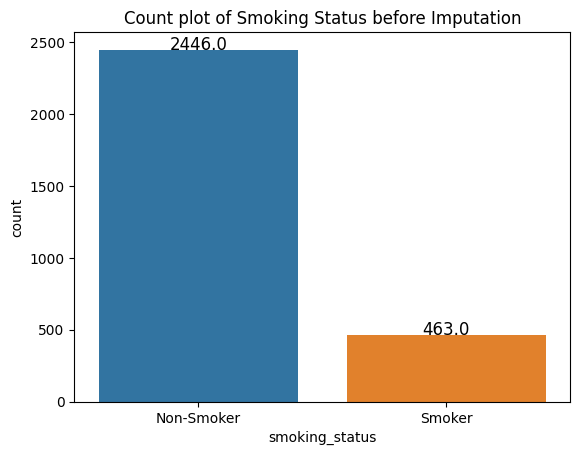

In [266]:
ax = sns.countplot(x = 'smoking_status', data = patient_df)
# Annotate the count values on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black')
plt.title('Count plot of Smoking Status before Imputation')
plt.show()

In [267]:
# Impute missing values in smoking_status with Mode
mode_ss = patient_df['smoking_status'].mode().values[0]
patient_df['smoking_status'].fillna(mode_ss, inplace = True)

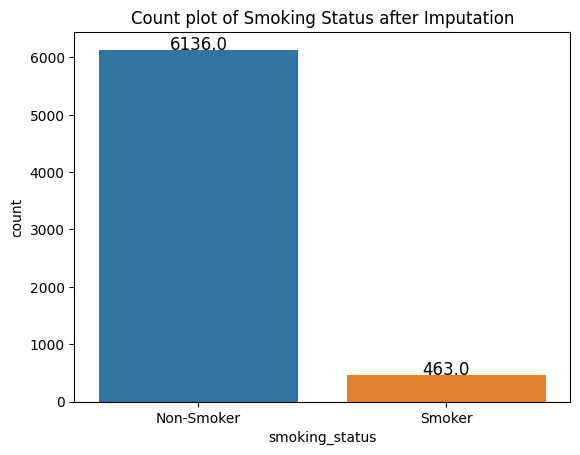

In [268]:
ax = sns.countplot(x = 'smoking_status', data = patient_df)
# Annotate the count values on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black')
plt.title('Count plot of Smoking Status after Imputation')
plt.show()

In [269]:
check_nulls = pd.DataFrame({'Column Name': patient_df.columns,
                            'Null Count': patient_df.isna().sum(),
                            'Null Percentage' : patient_df.isna().sum() / patient_df.shape[0] * 100})
check_nulls

,Column Name,Null Count,Null Percentage
PatientGuid,PatientGuid,0,0.000000
DMIndicator,DMIndicator,0,0.000000
Gender,Gender,0,0.000000
State,State,0,0.000000
Height,Height,0,0.000000
Weight,Weight,0,0.000000
BMI,BMI,0,0.000000
SystolicBP,SystolicBP,0,0.000000
DiastolicBP,DiastolicBP,0,0.000000
RespiratoryRate,RespiratoryRate,1911,28.958933


Check the distribution of RespiratoryRate and Temperature to determine the correct imputation method

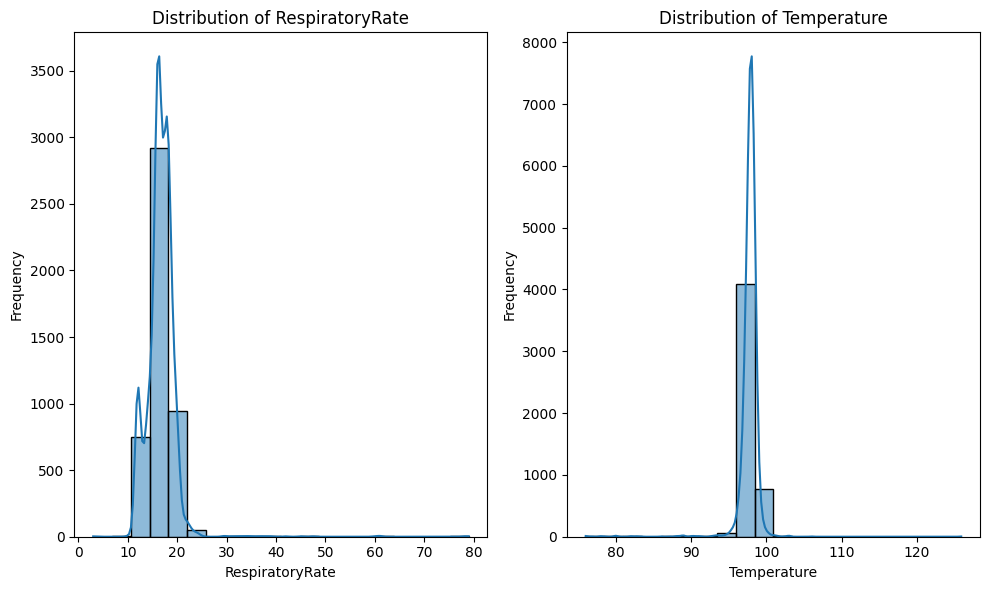

In [270]:
# Select columns with missing values
missing_columns = patient_df.columns[patient_df.isnull().any()]

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 6))
axes = axes.ravel()  # Flatten the 2D array of axes

for i, col in enumerate(missing_columns):
    sns.histplot(patient_df[col].dropna(), kde=True, bins=20, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Remove any empty subplots
for i in range(2, 1 * 2):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

Observations:
1. RespiratoryRate:
  The distribution is right-skewed. I will impute the missing values with Median. Median is less sensitive to extreme values.

2. Temperature:
  The distribution is approximately normal. I will impute the missing values with Mean.

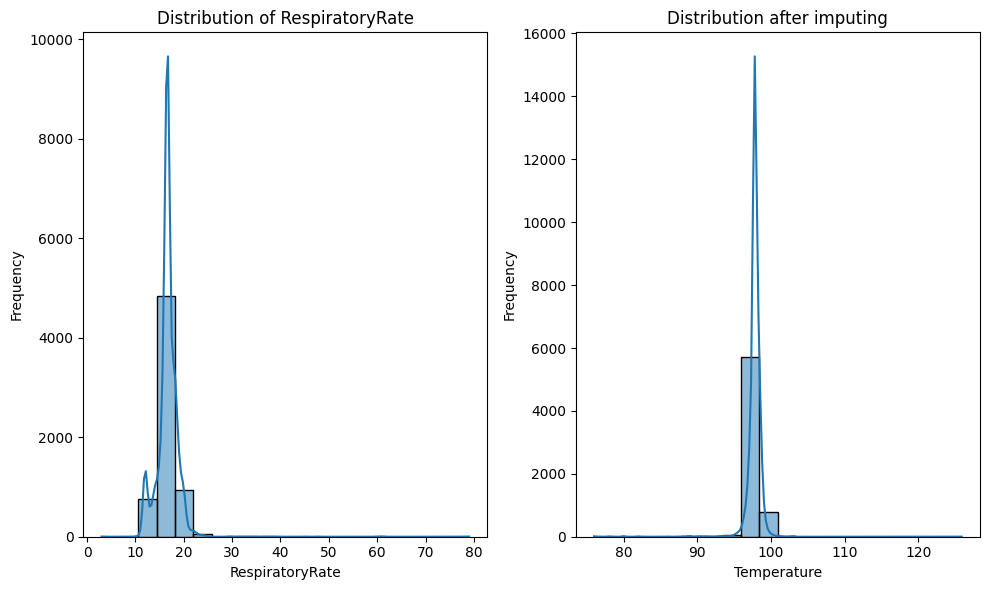

In [271]:
# Impute missing values in RespiratoryRate with Median
median_rr = patient_df['RespiratoryRate'].median()
patient_df['RespiratoryRate'].fillna(median_rr, inplace = True)

# Impute the missing values in Temperature with Mean
mean_temp = patient_df['Temperature'].mean()
patient_df['Temperature'].fillna(mean_temp, inplace = True)

# Check the distribution after imputing
fig, axes = plt.subplots(1, 2, figsize=(10, 6))
axes = axes.ravel()  # Flatten the 2D array of axes

for i, col in enumerate(missing_columns):
    sns.histplot(patient_df[col].dropna(), kde=True, bins=20, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Remove any empty subplots
for i in range(2, 1 * 2):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.title('Distribution after imputing')
plt.show()

We can see that imputation didn't make any significant changes to the distribution of RespiratoryRate and Temperature, suggesting that the imputation method is successful without introducing any bias into the data.

In [272]:
patient_df.describe()

,DMIndicator,Height,Weight,BMI,SystolicBP,DiastolicBP,RespiratoryRate,Temperature,Age
count,6599.000000,6599.000000,6599.000000,6599.000000,6599.000000,6599.000000,6599.000000,6599.000000,6599.000000
mean,0.191847,65.823718,118.928199,19.575564,126.175050,76.826042,16.670438,97.774719,65.450068
std,0.393783,4.504455,61.499272,60.758414,13.727157,8.254487,2.543608,1.243189,17.507723
min,0.000000,32.500000,1.552294,0.122124,77.000000,40.000000,3.000000,76.000000,29.000000
25%,0.000000,63.000000,70.026316,7.638304,117.000000,71.500000,16.000000,97.646727,52.000000
50%,0.000000,65.933333,117.171429,14.872909,125.428571,76.800000,16.666667,97.774719,66.000000
75%,0.000000,69.000000,162.477273,23.236135,134.292857,81.844130,17.600000,98.134314,78.500000
max,1.000000,107.299895,483.333333,2352.890031,201.333333,132.210526,79.000000,125.866667,101.000000


In [273]:
patient_df.DMIndicator.value_counts()

0.0    5333
1.0    1266
Name: DMIndicator, dtype: int64

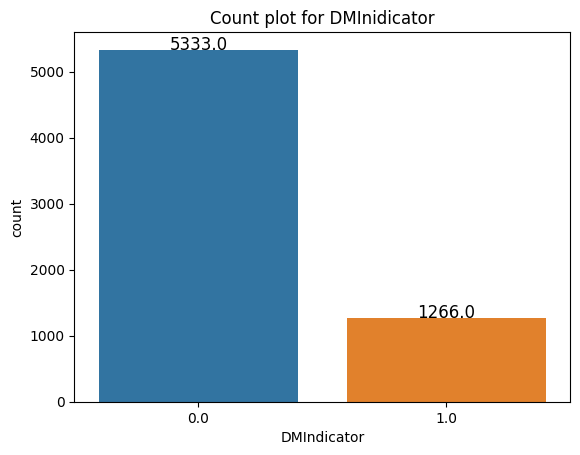

In [274]:
ax = sns.countplot(x = 'DMIndicator', data = patient_df)

# Annotate the count values on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black')

plt.title('Count plot for DMInidicator')
plt.show()

DMIndicator is imbalanced. Need to address this issue to ensure the model doesn't become biased towards the majority class.

<Figure size 1000x800 with 0 Axes>

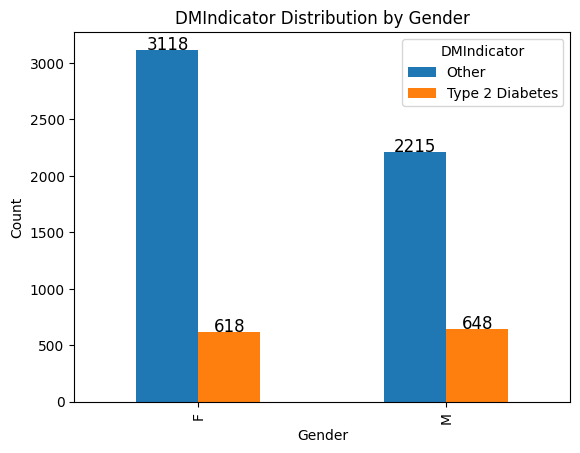

In [275]:
# Get the value counts of 'DMIndicator' by each 'Gender'
gender_dm_counts = patient_df.groupby(['Gender', 'DMIndicator']).size().unstack().fillna(0)

plt.figure(figsize=(10, 8))
ax = gender_dm_counts.plot(kind='bar', stacked=False)

# Annotate the count values on the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black')

plt.title('DMIndicator Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='DMIndicator', labels=['Other', 'Type 2 Diabetes'])
plt.show()

The graph shows that the men are more likely to have type 2 diabetes than women.

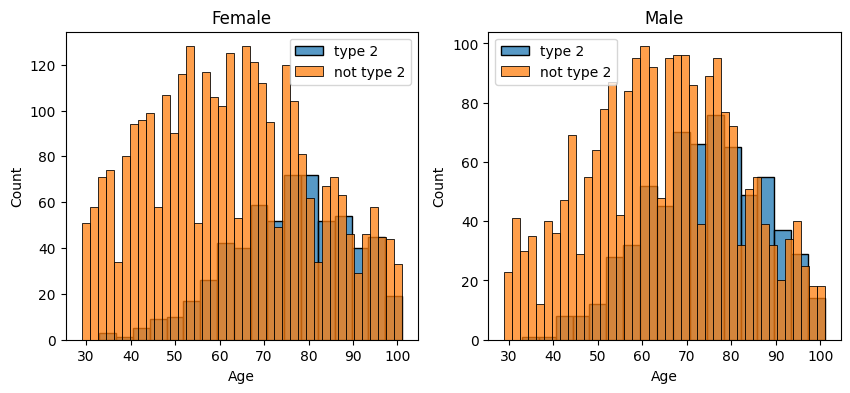

In [276]:
# Age and Sex
t2dm = 'type 2'
not_t2dm = 'not type 2'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = patient_df[patient_df['Gender']=='F']
men = patient_df[patient_df['Gender']=='M']
ax = sns.histplot(women[women['DMIndicator']==1].Age.dropna(), bins=18, label = t2dm, ax = axes[0], kde =False)
ax = sns.histplot(women[women['DMIndicator']==0].Age.dropna(), bins=40, label = not_t2dm, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.histplot(men[men['DMIndicator']==1].Age.dropna(), bins=18, label = t2dm, ax = axes[1], kde = False)
ax = sns.histplot(men[men['DMIndicator']==0].Age.dropna(), bins=40, label = not_t2dm, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

The number of people with Type 2 Diabetes increasing with age for both genders which is consistent with the fact that type 2 diabetes is more prevalent in older adults.

The number of people with Type 2 Diabetes mostly aged between 60 and 90.


<Figure size 1000x800 with 0 Axes>

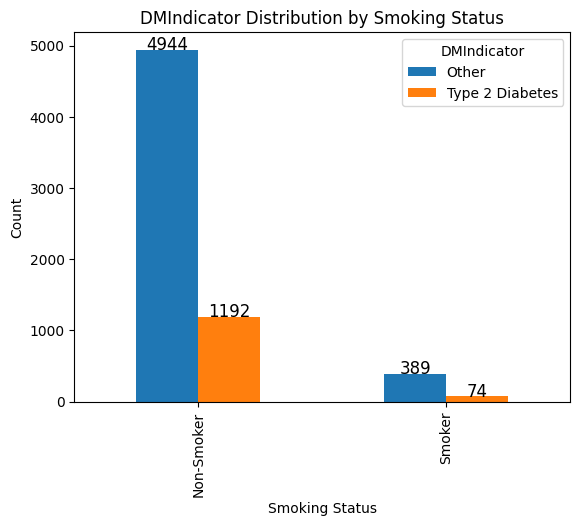

In [277]:
# Get the value counts of 'DMIndicator' by each 'smoking_status'
smoking_counts = patient_df.groupby(['smoking_status', 'DMIndicator']).size().unstack().fillna(0)

plt.figure(figsize=(10, 8))
ax = smoking_counts.plot(kind='bar', stacked=False)

# Annotate the count values on the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black')

plt.title('DMIndicator Distribution by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.legend(title='DMIndicator', labels=['Other', 'Type 2 Diabetes'])
plt.show()

The graph shows that the people who does not smoke are more likely to have Type 2 Diabetes than people who smoke.

This could be due to the fact that there were smoking description such as current status unknown and NAs that might have been the reason of such miss classification.

Also, People who smoke are more likely to be sedentary and drink alcohol and have obesity. Hence the smoking status is associated with diabetes.

<Figure size 1000x600 with 0 Axes>

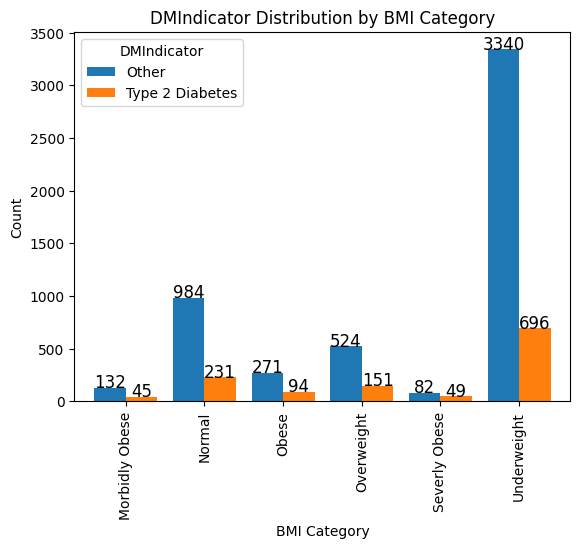

In [278]:
# Get the value counts of 'DMIndicator' by each 'bmi category'
bmi_counts = patient_df.groupby(['BMI_category', 'DMIndicator']).size().unstack().fillna(0)

plt.figure(figsize=(10, 6))
ax = bmi_counts.plot(kind='bar', width = 0.8, stacked=False)

# Annotate the count values on the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black')

plt.title('DMIndicator Distribution by BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.legend(title='DMIndicator', labels=['Other', 'Type 2 Diabetes'])
plt.show()

The highest number of people who have type 2 diabetes are underweight. The lifestyle that puts thin people at risk for diabetes includes: Little or no physical activity.

The people who are overweight are also at the risk of developing type 2 diabetes. The more excess weight you have, the more resistant your muscle and tissue cells become to your own insulin hormone.

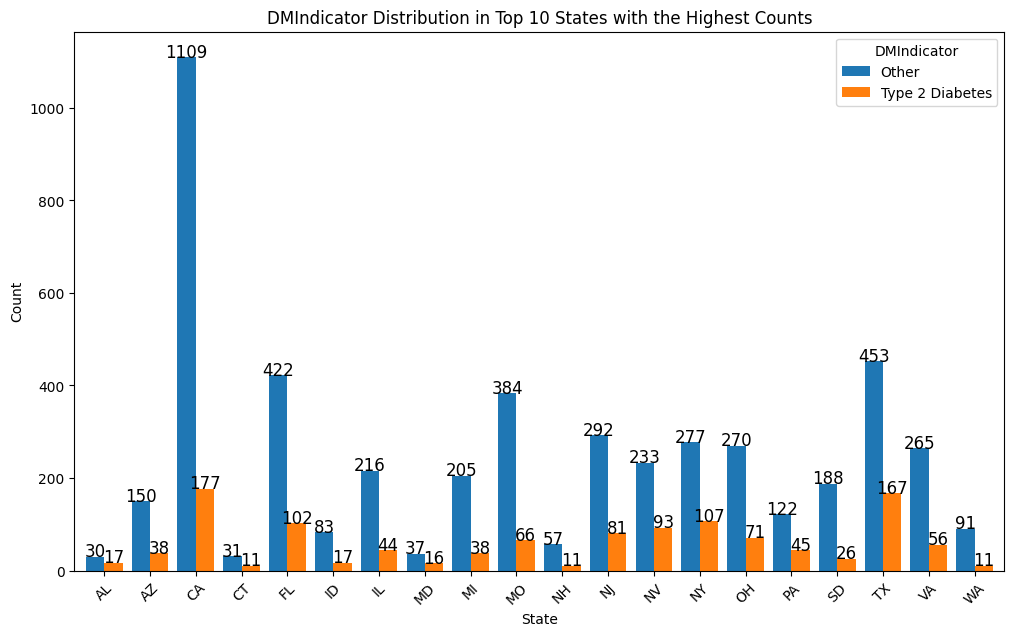

In [279]:
# Group the data by 'State' and 'DMIndicator' to get counts
state_dm_counts = patient_df.groupby(['State', 'DMIndicator']).size().unstack().fillna(0)

# Find the top 10 states with the highest counts of Type 2 Diabetes cases (DMIndicator = 1)
top_10_states = state_dm_counts[1].nlargest(20).index

# Filter the data for the top 10 states
top_10_state_data = patient_df[patient_df['State'].isin(top_10_states)]

# Create a figure and set the figure size
fig, ax = plt.subplots(figsize=(12, 7))

# Create a bar plot for the top 10 states
top_10_state_dm_counts = top_10_state_data.groupby(['State', 'DMIndicator']).size().unstack().fillna(0)
top_10_state_dm_counts.plot(kind='bar', stacked=False, width=0.8, ax=ax)

# Annotate the count values on the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black')

plt.title('DMIndicator Distribution in Top 10 States with the Highest Counts')
plt.xlabel('State')
plt.ylabel('Count')
plt.legend(title='DMIndicator', labels=['Other', 'Type 2 Diabetes'])
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

California has the highest number of people with Type 2 Diabetes, followed by Texas and Pennsylvania.



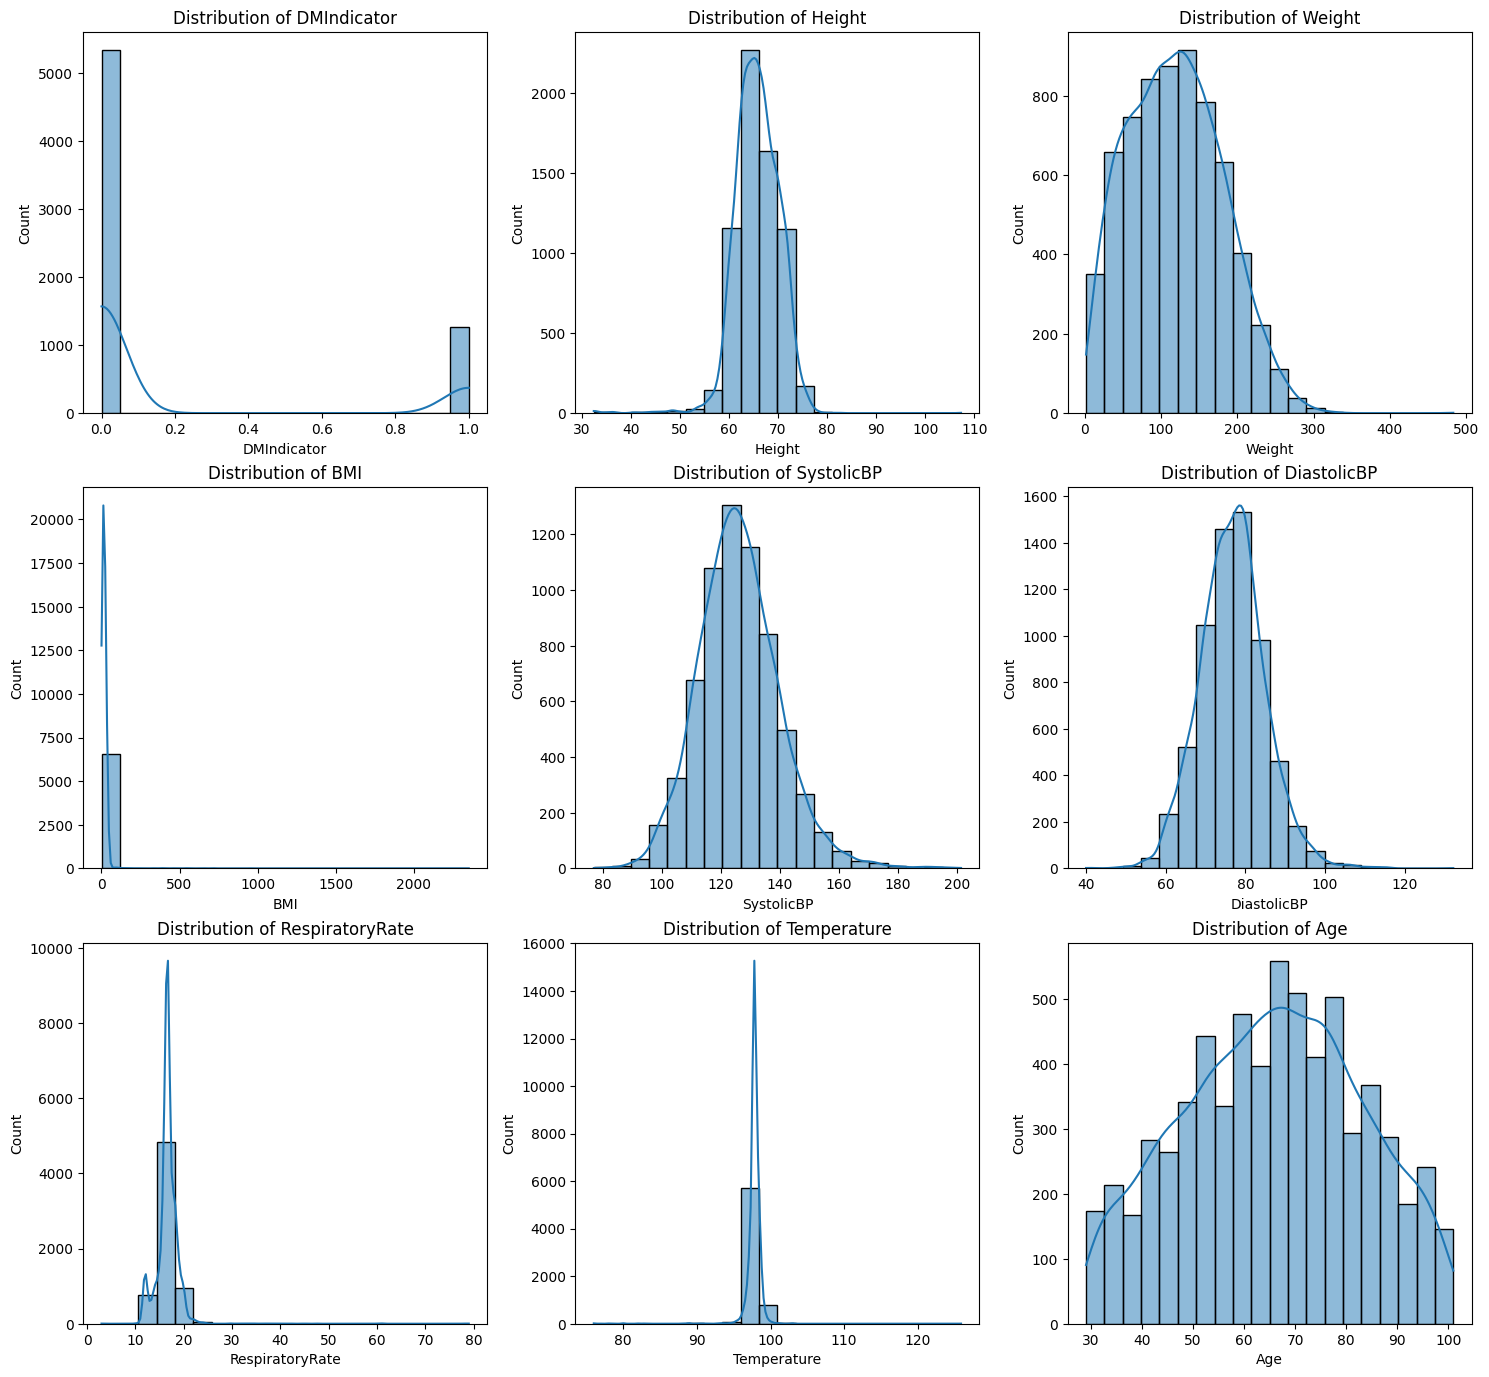

In [280]:
numeric_columns = ['DMIndicator', 'Height', 'Weight', 'BMI', 'SystolicBP', 'DiastolicBP', 'RespiratoryRate', 'Temperature', 'Age']

fig, axes = plt.subplots(3, 3, figsize=(15, 15))

for i, column in enumerate(numeric_columns):
    row, col = divmod(i, 3)
    sns.histplot(data=patient_df, x=column, bins=20, kde=True, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {column}')

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

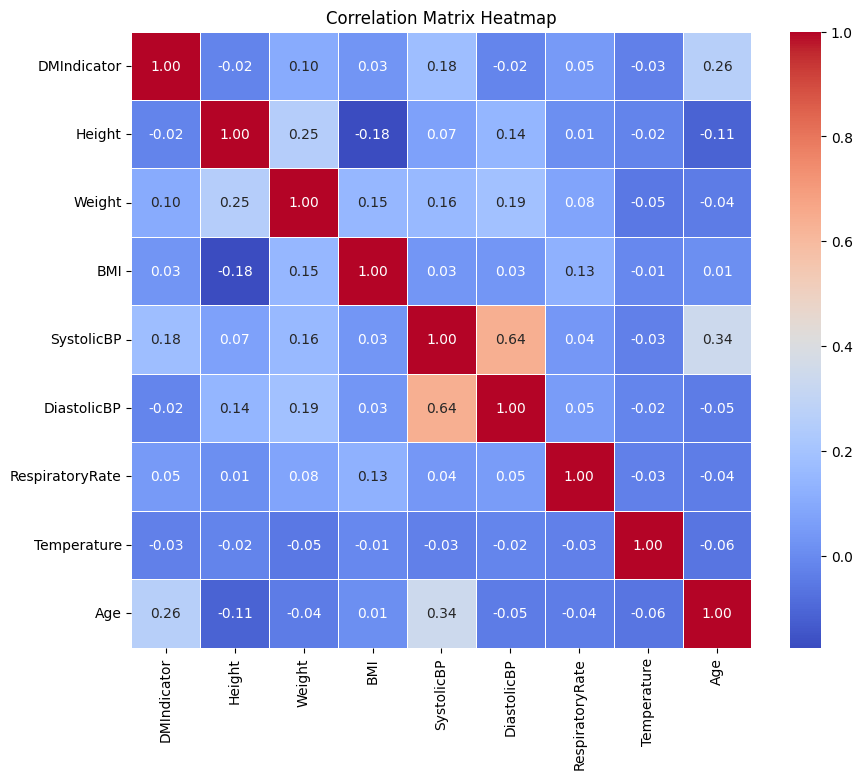

In [283]:
# Compute the correlation matrix
correlation_matrix = patient_df[numeric_columns].corr(numeric_only=True)

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Set the title and display the plot
plt.title('Correlation Matrix Heatmap')
plt.show()

In [285]:
patient_df.drop(columns = ['State', 'PatientGuid', 'Height', 'Weight', 'BMI'], axis = 1, inplace = True)

In [286]:
patient_df

,DMIndicator,Gender,SystolicBP,DiastolicBP,RespiratoryRate,Temperature,Age,smoking_status,BMI_category
0,0.0,M,133.714286,72.714286,16.666667,97.774719,94.0,Non-Smoker,Underweight
1,0.0,F,109.400000,66.300000,16.666667,97.561818,38.0,Non-Smoker,Underweight
2,0.0,F,122.666667,88.000000,16.666667,97.833333,39.0,Non-Smoker,Normal
3,0.0,M,124.166667,78.333333,18.833333,98.141667,64.0,Smoker,Overweight
4,0.0,F,114.400000,77.200000,19.333333,94.775000,33.0,Non-Smoker,Obese
...,...,...,...,...,...,...,...,...,...
6595,0.0,M,130.545455,71.545455,15.125000,97.774719,98.0,Non-Smoker,Underweight
6596,0.0,M,108.000000,71.333333,16.666667,90.366667,54.0,Non-Smoker,Underweight
6597,0.0,F,130.333333,89.333333,16.666667,97.774719,65.0,Non-Smoker,Underweight
6598,0.0,M,139.000000,86.000000,13.500000,97.975000,67.0,Non-Smoker,Underweight


# Modeling

In [287]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split, learning_curve, cross_val_score, StratifiedKFold
from sklearn.metrics import brier_score_loss, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc, accuracy_score, precision_score, recall_score
from sklearn import linear_model
from sklearn.metrics import brier_score_loss, make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [288]:
# Split the target variable and features
X = patient_df.drop("DMIndicator", axis=1)
y = patient_df["DMIndicator"].values

In [289]:
# perform one-hot encoding for nominal categorical variables
X_encoded = pd.get_dummies(X, columns = ['smoking_status', 'Gender'])
X_encoded

,SystolicBP,DiastolicBP,RespiratoryRate,Temperature,Age,BMI_category,smoking_status_Non-Smoker,smoking_status_Smoker,Gender_F,Gender_M
0,133.714286,72.714286,16.666667,97.774719,94.0,Underweight,1,0,0,1
1,109.400000,66.300000,16.666667,97.561818,38.0,Underweight,1,0,1,0
2,122.666667,88.000000,16.666667,97.833333,39.0,Normal,1,0,1,0
3,124.166667,78.333333,18.833333,98.141667,64.0,Overweight,0,1,0,1
4,114.400000,77.200000,19.333333,94.775000,33.0,Obese,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
6595,130.545455,71.545455,15.125000,97.774719,98.0,Underweight,1,0,0,1
6596,108.000000,71.333333,16.666667,90.366667,54.0,Underweight,1,0,0,1
6597,130.333333,89.333333,16.666667,97.774719,65.0,Underweight,1,0,1,0
6598,139.000000,86.000000,13.500000,97.975000,67.0,Underweight,1,0,0,1


In [290]:
# Create a mapping dictionary for ordinal categories
ordinal_mapping = {
    'Underweight': 1,
    'Normal': 2,
    'Overweight': 3,
    'Obese': 4,
    'Severly Obese': 5,
    'Morbidly Obese':6
}

# Apply the mapping to the 'BMI_category' column
X_encoded['BMI_category']  = X['BMI_category'].map(ordinal_mapping)
X_encoded

,SystolicBP,DiastolicBP,RespiratoryRate,Temperature,Age,BMI_category,smoking_status_Non-Smoker,smoking_status_Smoker,Gender_F,Gender_M
0,133.714286,72.714286,16.666667,97.774719,94.0,1,1,0,0,1
1,109.400000,66.300000,16.666667,97.561818,38.0,1,1,0,1,0
2,122.666667,88.000000,16.666667,97.833333,39.0,2,1,0,1,0
3,124.166667,78.333333,18.833333,98.141667,64.0,3,0,1,0,1
4,114.400000,77.200000,19.333333,94.775000,33.0,4,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
6595,130.545455,71.545455,15.125000,97.774719,98.0,1,1,0,0,1
6596,108.000000,71.333333,16.666667,90.366667,54.0,1,1,0,0,1
6597,130.333333,89.333333,16.666667,97.774719,65.0,1,1,0,1,0
6598,139.000000,86.000000,13.500000,97.975000,67.0,1,1,0,0,1


In [291]:
# Scaling the data
scaler = StandardScaler()
X_encoded_scaled = scaler.fit_transform(X_encoded)


# Split the train data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded_scaled, y, test_size=0.3, random_state=42)
print(X_train.shape)
print(y_train.shape)

(4619, 10)
(4619,)


In [293]:
def evaluation(model):

    model.fit(X_train, y_train)
    ypred = model.predict(X_test)

    predicted_probs = model.predict_proba(X_test)[:, 1]

    brier_score = brier_score_loss(y_test, predicted_probs)

    print(f'Brier score: {brier_score}')

    return brier_score

## Logistics Regression

In [294]:
logreg = LogisticRegression()
#logreg.fit(X_train_resampled, y_train_resampled)
logreg.fit(X_train, y_train)

y_pred_log_reg = logreg.predict(X_test)

acc_log_reg = round(logreg.score(X_test, y_test) * 100, 2)
print("The accuracy of Logistic Regression is {0}%".format(acc_log_reg))

The accuracy of Logistic Regression is 81.57%


In [329]:
n_splits = 10

# Initialize the StratifiedKFold cross-validation splitter
stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Perform stratified k-fold cross-validation
brier_scores_log_reg = cross_val_score(logreg, X_train, y_train, cv=stratified_kfold, scoring=make_scorer(brier_score_loss))

# Print the Brier scores for each fold and the mean Brier score
print("Brier Scores for Each Fold:", brier_scores_log_reg)
print("Mean Brier Score:", np.mean(brier_scores_log_reg))

Brier Scores for Each Fold: [0.2034632  0.20779221 0.20562771 0.19480519 0.2012987  0.2012987
 0.22727273 0.1969697  0.18398268 0.18872017]
Mean Brier Score: 0.20112309960466143


In [330]:
bscore_log_reg = evaluation(logreg)

Brier score: 0.1370640838701046


## Linear Support Vector Machine

In [331]:
svc = SVC(kernel='linear', C=0.1, probability = True)
svc.fit(X_train, y_train)

y_pred_svc = svc.predict(X_test)

acc_svc = round(svc.score(X_test, y_test) * 100, 2)
print("The accuracy of SVM is {0}%".format(acc_svc))

The accuracy of SVM is 81.72%


In [332]:
n_splits = 10

# Initialize the StratifiedKFold cross-validation splitter
stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Perform stratified k-fold cross-validation
brier_scores_svc = cross_val_score(svc, X_train, y_train, cv=stratified_kfold, scoring=make_scorer(brier_score_loss))

# Print the Brier scores for each fold and the mean Brier score
print("Brier Scores for Each Fold:", brier_scores_svc)
print("Mean Brier Score:", np.mean(brier_scores_svc))

Brier Scores for Each Fold: [0.19480519 0.19480519 0.19480519 0.19480519 0.19480519 0.1969697
 0.1969697  0.1969697  0.1969697  0.19522777]
Mean Brier Score: 0.19571325276314433


In [333]:
bscore_svc = evaluation(svc)

Brier score: 0.15237391914605244


## K Nearest Neighbors

In [335]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

acc_knn = round(knn.score(X_test, y_test) * 100, 2)
print("The accuracy of K Nearest Neighbours is {0}%".format(acc_knn))

The accuracy of K Nearest Neighbours is 76.92%


In [336]:
n_splits = 10

# Initialize the StratifiedKFold cross-validation splitter
stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Perform stratified k-fold cross-validation
brier_scores_knn = cross_val_score(knn, X_train, y_train, cv=stratified_kfold, scoring=make_scorer(brier_score_loss))

# Print the Brier scores for each fold and the mean Brier score
print("Brier Scores for Each Fold:", brier_scores_knn)
print("Mean Brier Score:", np.mean(brier_scores_knn))

Brier Scores for Each Fold: [0.23809524 0.25108225 0.23160173 0.24458874 0.21645022 0.23160173
 0.22077922 0.23593074 0.22943723 0.24295011]
Mean Brier Score: 0.23425172080269693


In [337]:
bscore_knn = evaluation(knn)

Brier score: 0.1794612794612795


## Decision Tree Classifier

In [338]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

y_pred_decision_tree = decision_tree.predict(X_test)

acc_decision_tree = round(decision_tree.score(X_test, y_test) * 100, 2)
print("The accuracy of Decision Tree Classifier is {0}%".format(acc_decision_tree))

The accuracy of Decision Tree Classifier is 71.82%


In [339]:
n_splits = 10

# Initialize the StratifiedKFold cross-validation splitter
stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Perform stratified k-fold cross-validation
brier_scores_decision_tree = cross_val_score(decision_tree, X_train, y_train, cv=stratified_kfold, scoring=make_scorer(brier_score_loss))

# Print the Brier scores for each fold and the mean Brier score
print("Brier Scores for Each Fold:", brier_scores_decision_tree)
print("Mean Brier Score:", np.mean(brier_scores_decision_tree))

Brier Scores for Each Fold: [0.27489177 0.27489177 0.28787879 0.28354978 0.27489177 0.27056277
 0.2987013  0.24458874 0.27922078 0.28850325]
Mean Brier Score: 0.2777680742973584


In [340]:
bscore_decision_tree = evaluation(decision_tree)

Brier score: 0.28484848484848485


## Random Forest Classifier

In [341]:
random_forest = RandomForestClassifier(criterion = 'gini',
                                  n_estimators = 100,
                                  max_depth = 3,
                                  min_samples_split=6,
                                  min_samples_leaf=6,
                                  random_state=3,
                                  oob_score = True)

random_forest.fit(X_train, y_train)

y_pred_random_forest = random_forest.predict(X_test)

acc_random_forest = round(random_forest.score(X_test, y_test) * 100, 2)
print("The accuracy of Random Forest is {0}%".format(acc_random_forest))

The accuracy of Random Forest is 81.72%


In [342]:
n_splits = 10

# Initialize the StratifiedKFold cross-validation splitter
stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Perform stratified k-fold cross-validation
brier_scores_random_forest = cross_val_score(random_forest, X_train, y_train, cv=stratified_kfold, scoring=make_scorer(brier_score_loss))

# Print the Brier scores for each fold and the mean Brier score
print("Brier Scores for Each Fold:", brier_scores_random_forest)
print("Mean Brier Score:", np.mean(brier_scores_random_forest))

Brier Scores for Each Fold: [0.19480519 0.19480519 0.19480519 0.19480519 0.19480519 0.1969697
 0.1969697  0.1969697  0.1969697  0.19522777]
Mean Brier Score: 0.19571325276314433


In [343]:
bscore_random_forest = evaluation(random_forest)

Brier score: 0.13840830876113602


## Gaussian Naive Bayes

In [344]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred_gnb = gnb.predict(X_test)

acc_gnb = round(gnb.score(X_test, y_test) * 100, 2)
print("The accuracy of Random Forest is {0}%".format(acc_gnb))

The accuracy of Random Forest is 79.04%


In [345]:
n_splits = 10

# Initialize the StratifiedKFold cross-validation splitter
stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Perform stratified k-fold cross-validation
brier_scores_gnb = cross_val_score(gnb, X_train, y_train, cv=stratified_kfold, scoring=make_scorer(brier_score_loss))

# Print the Brier scores for each fold and the mean Brier score
print("Brier Scores for Each Fold:", brier_scores_gnb)
print("Mean Brier Score:", np.mean(brier_scores_gnb))

Brier Scores for Each Fold: [0.21428571 0.20562771 0.24458874 0.23160173 0.22510823 0.24025974
 0.24675325 0.22727273 0.23160173 0.20390456]
Mean Brier Score: 0.22710041224141006


In [346]:
bscore_gnb = evaluation(gnb)

Brier score: 0.15150574236430814


## Stochastic Gradient Descent

In [347]:
from sklearn.calibration import CalibratedClassifierCV

sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd = CalibratedClassifierCV(sgd)

sgd.fit(X_train, y_train)

y_pred_sgd = sgd.predict(X_test)

acc_sgd = round(sgd.score(X_test, y_test) * 100, 2)
print("The accuracy of SGD is {0}%".format(acc_sgd))

The accuracy of SGD is 81.72%


In [348]:
n_splits = 10

# Initialize the StratifiedKFold cross-validation splitter
stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Perform stratified k-fold cross-validation
brier_scores_sgd = cross_val_score(sgd, X_train, y_train, cv=stratified_kfold, scoring=make_scorer(brier_score_loss))

# Print the Brier scores for each fold and the mean Brier score
print("Brier Scores for Each Fold:", brier_scores_sgd)
print("Mean Brier Score:", np.mean(brier_scores_sgd))

Brier Scores for Each Fold: [0.19480519 0.19480519 0.19480519 0.1969697  0.19480519 0.1991342
 0.1969697  0.1969697  0.1969697  0.19522777]
Mean Brier Score: 0.19614615319604473


In [349]:
bscore_sgd = evaluation(sgd)

Brier score: 0.14078828228060875


# Model Selection

In [350]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Linear Support Vector Machines',
              'KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes',  'Stochastic Gradient Descent'],

    'Accuracy': [acc_log_reg, acc_svc, acc_knn,  acc_decision_tree, acc_random_forest, acc_gnb,acc_sgd],

    'Brier Score': [bscore_log_reg, bscore_svc, bscore_knn,  bscore_decision_tree, bscore_random_forest, bscore_gnb, bscore_sgd]
    })

models.sort_values(by='Brier Score', ascending=True)

,Model,Accuracy,Brier Score
0,Logistic Regression,81.57,0.137064
4,Random Forest,81.72,0.138408
6,Stochastic Gradient Descent,81.72,0.140788
5,Naive Bayes,79.04,0.151506
1,Linear Support Vector Machines,81.72,0.152374
2,KNN,76.92,0.179461
3,Decision Tree,71.82,0.284848


After comparing the brier score of each model, **Logistic Regression** seems to have best brier score.

# Make prediction on hold out dataset

## Import holdout dataset

In [445]:
test_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data Science in Healthcare/Diabetes Prediction/test_SyncPatient.csv")
print(test_df.shape)
test_df.head()

(3348, 5)


,PatientGuid,Gender,YearOfBirth,State,PracticeGuid
0,027AC271-0852-4DDD-99C2-A74FE50066E0,F,1978,CA,4D27688B-C925-4513-9CF9-8D281ACC6712
1,C5D4C6FA-A2B3-4CCD-A8D5-A760127CE47D,F,1941,PA,44C560D5-82B4-436A-9C72-C090F5377FD0
2,1F4D1486-7632-4576-AC92-A760680D1DC9,M,1938,VA,9891CFAA-9B40-4120-AE20-3A1D86064898
3,0F6AD971-F133-4BD7-B508-A76788D9C46C,M,1952,OH,64F84808-F87B-41CF-8E4B-5E0F456359B4
4,1E23496C-7AAF-4A91-AAF4-A769BD439E67,F,1961,FL,BD209FBC-E92C-4392-A085-1DDA42AF37BA


## Prepare holdout dataset

In [446]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3348 entries, 0 to 3347
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   PatientGuid   3348 non-null   object
 1   Gender        3348 non-null   object
 2   YearOfBirth   3348 non-null   int64 
 3   State         3348 non-null   object
 4   PracticeGuid  3348 non-null   object
dtypes: int64(1), object(4)
memory usage: 130.9+ KB


In [447]:
# merge test_Df and the aggregated SyncTranscript
test_df = pd.merge(test_df, transcript_aggregated, on='PatientGuid', how = 'left')
print(patient_info.shape)
test_df.head()

(3348, 12)


,PatientGuid,Gender,YearOfBirth,State,PracticeGuid,AvgHeight,AvgWeight,AvgBMI,AvgSystolicBP,AvgDiastolicBP,AvgRespiratoryRate,AvgTemperature
0,027AC271-0852-4DDD-99C2-A74FE50066E0,F,1978,CA,4D27688B-C925-4513-9CF9-8D281ACC6712,61.500000,87.823529,8.249353,113.687500,80.750000,19.0,97.550000
1,C5D4C6FA-A2B3-4CCD-A8D5-A760127CE47D,F,1941,PA,44C560D5-82B4-436A-9C72-C090F5377FD0,65.000000,166.933333,5.050000,136.000000,74.363636,NaN,NaN
2,1F4D1486-7632-4576-AC92-A760680D1DC9,M,1938,VA,9891CFAA-9B40-4120-AE20-3A1D86064898,67.000000,172.000000,26.936000,150.250000,74.250000,18.5,97.200000
3,0F6AD971-F133-4BD7-B508-A76788D9C46C,M,1952,OH,64F84808-F87B-41CF-8E4B-5E0F456359B4,69.000000,128.500000,9.376250,161.000000,104.000000,16.0,98.000000
4,1E23496C-7AAF-4A91-AAF4-A769BD439E67,F,1961,FL,BD209FBC-E92C-4392-A085-1DDA42AF37BA,61.111111,86.800000,16.339600,135.333333,87.333333,18.0,98.422222


In [448]:
# join smokingstatus and patient_info
test_df = pd.merge(test_df, latest_smoking_status, on = 'PatientGuid', how = 'left')
print(test_df.shape)
test_df.head()

(3348, 13)


,PatientGuid,Gender,YearOfBirth,State,PracticeGuid,AvgHeight,AvgWeight,AvgBMI,AvgSystolicBP,AvgDiastolicBP,AvgRespiratoryRate,AvgTemperature,Description
0,027AC271-0852-4DDD-99C2-A74FE50066E0,F,1978,CA,4D27688B-C925-4513-9CF9-8D281ACC6712,61.500000,87.823529,8.249353,113.687500,80.750000,19.0,97.550000,Not a current tobacco user
1,C5D4C6FA-A2B3-4CCD-A8D5-A760127CE47D,F,1941,PA,44C560D5-82B4-436A-9C72-C090F5377FD0,65.000000,166.933333,5.050000,136.000000,74.363636,NaN,NaN,NaN
2,1F4D1486-7632-4576-AC92-A760680D1DC9,M,1938,VA,9891CFAA-9B40-4120-AE20-3A1D86064898,67.000000,172.000000,26.936000,150.250000,74.250000,18.5,97.200000,NaN
3,0F6AD971-F133-4BD7-B508-A76788D9C46C,M,1952,OH,64F84808-F87B-41CF-8E4B-5E0F456359B4,69.000000,128.500000,9.376250,161.000000,104.000000,16.0,98.000000,NaN
4,1E23496C-7AAF-4A91-AAF4-A769BD439E67,F,1961,FL,BD209FBC-E92C-4392-A085-1DDA42AF37BA,61.111111,86.800000,16.339600,135.333333,87.333333,18.0,98.422222,0 cigarettes per day (non-smoker or less than ...


In [449]:
# rename the columns
test_df = test_df.rename(columns={'AvgHeight': 'Height',
                                                    'AvgWeight': 'Weight',
                                                    'AvgBMI': 'BMI',
                                                    'AvgSystolicBP' : 'SystolicBP',
                                                    'AvgDiastolicBP': 'DiastolicBP',
                                                    'AvgRespiratoryRate': 'RespiratoryRate',
                                                    'AvgTemperature': 'Temperature'})

print(test_df.shape)
test_df.head()

(3348, 13)


,PatientGuid,Gender,YearOfBirth,State,PracticeGuid,Height,Weight,BMI,SystolicBP,DiastolicBP,RespiratoryRate,Temperature,Description
0,027AC271-0852-4DDD-99C2-A74FE50066E0,F,1978,CA,4D27688B-C925-4513-9CF9-8D281ACC6712,61.500000,87.823529,8.249353,113.687500,80.750000,19.0,97.550000,Not a current tobacco user
1,C5D4C6FA-A2B3-4CCD-A8D5-A760127CE47D,F,1941,PA,44C560D5-82B4-436A-9C72-C090F5377FD0,65.000000,166.933333,5.050000,136.000000,74.363636,NaN,NaN,NaN
2,1F4D1486-7632-4576-AC92-A760680D1DC9,M,1938,VA,9891CFAA-9B40-4120-AE20-3A1D86064898,67.000000,172.000000,26.936000,150.250000,74.250000,18.5,97.200000,NaN
3,0F6AD971-F133-4BD7-B508-A76788D9C46C,M,1952,OH,64F84808-F87B-41CF-8E4B-5E0F456359B4,69.000000,128.500000,9.376250,161.000000,104.000000,16.0,98.000000,NaN
4,1E23496C-7AAF-4A91-AAF4-A769BD439E67,F,1961,FL,BD209FBC-E92C-4392-A085-1DDA42AF37BA,61.111111,86.800000,16.339600,135.333333,87.333333,18.0,98.422222,0 cigarettes per day (non-smoker or less than ...


In [450]:
test_df['Age'] = 2023 - test_df['YearOfBirth']
test_df.drop(columns = ['YearOfBirth'], axis = 1, inplace = True)
test_df.head()

,PatientGuid,Gender,State,PracticeGuid,Height,Weight,BMI,SystolicBP,DiastolicBP,RespiratoryRate,Temperature,Description,Age
0,027AC271-0852-4DDD-99C2-A74FE50066E0,F,CA,4D27688B-C925-4513-9CF9-8D281ACC6712,61.500000,87.823529,8.249353,113.687500,80.750000,19.0,97.550000,Not a current tobacco user,45
1,C5D4C6FA-A2B3-4CCD-A8D5-A760127CE47D,F,PA,44C560D5-82B4-436A-9C72-C090F5377FD0,65.000000,166.933333,5.050000,136.000000,74.363636,NaN,NaN,NaN,82
2,1F4D1486-7632-4576-AC92-A760680D1DC9,M,VA,9891CFAA-9B40-4120-AE20-3A1D86064898,67.000000,172.000000,26.936000,150.250000,74.250000,18.5,97.200000,NaN,85
3,0F6AD971-F133-4BD7-B508-A76788D9C46C,M,OH,64F84808-F87B-41CF-8E4B-5E0F456359B4,69.000000,128.500000,9.376250,161.000000,104.000000,16.0,98.000000,NaN,71
4,1E23496C-7AAF-4A91-AAF4-A769BD439E67,F,FL,BD209FBC-E92C-4392-A085-1DDA42AF37BA,61.111111,86.800000,16.339600,135.333333,87.333333,18.0,98.422222,0 cigarettes per day (non-smoker or less than ...,62


In [451]:
# Define a function to categorize descriptions
def categorize_smoking(description):
    if description in ["Not a current tobacco user", "0 cigarettes per day (previous smoker)", "0 cigarettes per day (non-smoker or less than 100 in lifetime)"]:
        return "Non-Smoker"
    elif pd.isna(description) or description in ["Current status unknown"]:
      return np.nan
    else:
        return "Smoker"

# Apply the categorize_smoking function to create a 'SmokingCategory' column
test_df['smoking_status'] = test_df['Description'].apply(categorize_smoking)
test_df.drop(columns = ['Description'], axis = 1, inplace = True)
test_df.head()

,PatientGuid,Gender,State,PracticeGuid,Height,Weight,BMI,SystolicBP,DiastolicBP,RespiratoryRate,Temperature,Age,smoking_status
0,027AC271-0852-4DDD-99C2-A74FE50066E0,F,CA,4D27688B-C925-4513-9CF9-8D281ACC6712,61.500000,87.823529,8.249353,113.687500,80.750000,19.0,97.550000,45,Non-Smoker
1,C5D4C6FA-A2B3-4CCD-A8D5-A760127CE47D,F,PA,44C560D5-82B4-436A-9C72-C090F5377FD0,65.000000,166.933333,5.050000,136.000000,74.363636,NaN,NaN,82,NaN
2,1F4D1486-7632-4576-AC92-A760680D1DC9,M,VA,9891CFAA-9B40-4120-AE20-3A1D86064898,67.000000,172.000000,26.936000,150.250000,74.250000,18.5,97.200000,85,NaN
3,0F6AD971-F133-4BD7-B508-A76788D9C46C,M,OH,64F84808-F87B-41CF-8E4B-5E0F456359B4,69.000000,128.500000,9.376250,161.000000,104.000000,16.0,98.000000,71,NaN
4,1E23496C-7AAF-4A91-AAF4-A769BD439E67,F,FL,BD209FBC-E92C-4392-A085-1DDA42AF37BA,61.111111,86.800000,16.339600,135.333333,87.333333,18.0,98.422222,62,Non-Smoker


In [452]:
# Function to categorize the BMI
def categorize_bmi(bmi):
  if bmi < 18.5:
    return 'Underweight'
  elif 18.5 <= bmi <= 24.9:
    return 'Normal'
  elif 25 <= bmi <= 29.9:
    return 'Overweight'
  elif 30 <= bmi <= 34.9:
    return 'Obese'
  elif 35 <= bmi <= 39.9:
    return 'Severly Obese'
  else:
    return 'Morbidly Obese'

# Apply the categorize_bmi function to create a 'BMI' column
test_df['BMI_category'] = test_df['BMI'].apply(categorize_bmi)
test_df.drop(columns = ['BMI'], axis =1, inplace = True)
test_df.head()

,PatientGuid,Gender,State,PracticeGuid,Height,Weight,SystolicBP,DiastolicBP,RespiratoryRate,Temperature,Age,smoking_status,BMI_category
0,027AC271-0852-4DDD-99C2-A74FE50066E0,F,CA,4D27688B-C925-4513-9CF9-8D281ACC6712,61.500000,87.823529,113.687500,80.750000,19.0,97.550000,45,Non-Smoker,Underweight
1,C5D4C6FA-A2B3-4CCD-A8D5-A760127CE47D,F,PA,44C560D5-82B4-436A-9C72-C090F5377FD0,65.000000,166.933333,136.000000,74.363636,NaN,NaN,82,NaN,Underweight
2,1F4D1486-7632-4576-AC92-A760680D1DC9,M,VA,9891CFAA-9B40-4120-AE20-3A1D86064898,67.000000,172.000000,150.250000,74.250000,18.5,97.200000,85,NaN,Overweight
3,0F6AD971-F133-4BD7-B508-A76788D9C46C,M,OH,64F84808-F87B-41CF-8E4B-5E0F456359B4,69.000000,128.500000,161.000000,104.000000,16.0,98.000000,71,NaN,Underweight
4,1E23496C-7AAF-4A91-AAF4-A769BD439E67,F,FL,BD209FBC-E92C-4392-A085-1DDA42AF37BA,61.111111,86.800000,135.333333,87.333333,18.0,98.422222,62,Non-Smoker,Underweight


In [453]:
# Check null values
check_nulls = pd.DataFrame({'Column Name': test_df.columns,
                            'Null Count': test_df.isna().sum(),
                            'Null Percentage' : test_df.isna().sum() / test_df.shape[0] * 100})
check_nulls

,Column Name,Null Count,Null Percentage
PatientGuid,PatientGuid,0,0.000000
Gender,Gender,0,0.000000
State,State,0,0.000000
PracticeGuid,PracticeGuid,0,0.000000
Height,Height,0,0.000000
Weight,Weight,0,0.000000
SystolicBP,SystolicBP,0,0.000000
DiastolicBP,DiastolicBP,0,0.000000
RespiratoryRate,RespiratoryRate,965,28.823178
Temperature,Temperature,832,24.850657


In [454]:
# Impute missing values in smoking_status with Mode
mode_ss = test_df['smoking_status'].mode().values[0]
test_df['smoking_status'].fillna(mode_ss, inplace = True)

# Impute missing values in RespiratoryRate with Median
median_rr = test_df['RespiratoryRate'].median()
test_df['RespiratoryRate'].fillna(median_rr, inplace = True)

# Impute the missing values in Temperature with Mean
mean_temp = test_df['Temperature'].mean()
test_df['Temperature'].fillna(mean_temp, inplace = True)

In [455]:
test_df.head(3)

,PatientGuid,Gender,State,PracticeGuid,Height,Weight,SystolicBP,DiastolicBP,RespiratoryRate,Temperature,Age,smoking_status,BMI_category
0,027AC271-0852-4DDD-99C2-A74FE50066E0,F,CA,4D27688B-C925-4513-9CF9-8D281ACC6712,61.5,87.823529,113.6875,80.750000,19.000000,97.550000,45,Non-Smoker,Underweight
1,C5D4C6FA-A2B3-4CCD-A8D5-A760127CE47D,F,PA,44C560D5-82B4-436A-9C72-C090F5377FD0,65.0,166.933333,136.0000,74.363636,16.666667,97.697836,82,Non-Smoker,Underweight
2,1F4D1486-7632-4576-AC92-A760680D1DC9,M,VA,9891CFAA-9B40-4120-AE20-3A1D86064898,67.0,172.000000,150.2500,74.250000,18.500000,97.200000,85,Non-Smoker,Overweight


In [456]:
# update test df
new_test_df = test_df.drop(columns = ['State', 'PracticeGuid', 'Height', 'Weight'], axis = 1)
new_test_df.head()

,PatientGuid,Gender,SystolicBP,DiastolicBP,RespiratoryRate,Temperature,Age,smoking_status,BMI_category
0,027AC271-0852-4DDD-99C2-A74FE50066E0,F,113.687500,80.750000,19.000000,97.550000,45,Non-Smoker,Underweight
1,C5D4C6FA-A2B3-4CCD-A8D5-A760127CE47D,F,136.000000,74.363636,16.666667,97.697836,82,Non-Smoker,Underweight
2,1F4D1486-7632-4576-AC92-A760680D1DC9,M,150.250000,74.250000,18.500000,97.200000,85,Non-Smoker,Overweight
3,0F6AD971-F133-4BD7-B508-A76788D9C46C,M,161.000000,104.000000,16.000000,98.000000,71,Non-Smoker,Underweight
4,1E23496C-7AAF-4A91-AAF4-A769BD439E67,F,135.333333,87.333333,18.000000,98.422222,62,Non-Smoker,Underweight


In [457]:
# perform one-hot encoding for nominal categorical variables
holdout_X = pd.get_dummies(new_test_df, columns = ['smoking_status', 'Gender'])
holdout_X.head()

,PatientGuid,SystolicBP,DiastolicBP,RespiratoryRate,Temperature,Age,BMI_category,smoking_status_Non-Smoker,smoking_status_Smoker,Gender_F,Gender_M
0,027AC271-0852-4DDD-99C2-A74FE50066E0,113.687500,80.750000,19.000000,97.550000,45,Underweight,1,0,1,0
1,C5D4C6FA-A2B3-4CCD-A8D5-A760127CE47D,136.000000,74.363636,16.666667,97.697836,82,Underweight,1,0,1,0
2,1F4D1486-7632-4576-AC92-A760680D1DC9,150.250000,74.250000,18.500000,97.200000,85,Overweight,1,0,0,1
3,0F6AD971-F133-4BD7-B508-A76788D9C46C,161.000000,104.000000,16.000000,98.000000,71,Underweight,1,0,0,1
4,1E23496C-7AAF-4A91-AAF4-A769BD439E67,135.333333,87.333333,18.000000,98.422222,62,Underweight,1,0,1,0


In [458]:
# Create a mapping dictionary for ordinal categories
ordinal_mapping = {
    'Underweight': 1,
    'Normal': 2,
    'Overweight': 3,
    'Obese': 4,
    'Severly Obese': 5,
    'Morbidly Obese':6
}

# Apply the mapping to the 'BMI_category' column
holdout_X['BMI_category']  = new_test_df['BMI_category'].map(ordinal_mapping)
holdout_X.head()

,PatientGuid,SystolicBP,DiastolicBP,RespiratoryRate,Temperature,Age,BMI_category,smoking_status_Non-Smoker,smoking_status_Smoker,Gender_F,Gender_M
0,027AC271-0852-4DDD-99C2-A74FE50066E0,113.687500,80.750000,19.000000,97.550000,45,1,1,0,1,0
1,C5D4C6FA-A2B3-4CCD-A8D5-A760127CE47D,136.000000,74.363636,16.666667,97.697836,82,1,1,0,1,0
2,1F4D1486-7632-4576-AC92-A760680D1DC9,150.250000,74.250000,18.500000,97.200000,85,3,1,0,0,1
3,0F6AD971-F133-4BD7-B508-A76788D9C46C,161.000000,104.000000,16.000000,98.000000,71,1,1,0,0,1
4,1E23496C-7AAF-4A91-AAF4-A769BD439E67,135.333333,87.333333,18.000000,98.422222,62,1,1,0,1,0


In [459]:
patient_guids = holdout_X['PatientGuid']
holdout_X.drop(columns = ['PatientGuid'], axis = 1, inplace = True)
holdout_X.head()

,SystolicBP,DiastolicBP,RespiratoryRate,Temperature,Age,BMI_category,smoking_status_Non-Smoker,smoking_status_Smoker,Gender_F,Gender_M
0,113.687500,80.750000,19.000000,97.550000,45,1,1,0,1,0
1,136.000000,74.363636,16.666667,97.697836,82,1,1,0,1,0
2,150.250000,74.250000,18.500000,97.200000,85,3,1,0,0,1
3,161.000000,104.000000,16.000000,98.000000,71,1,1,0,0,1
4,135.333333,87.333333,18.000000,98.422222,62,1,1,0,1,0


In [460]:
# Scaling the data
scaler = StandardScaler()
holdout_X = scaler.fit_transform(holdout_X)

## Make Predictions

In [468]:
# Predicting using the Logistic Regression model

result_pred = logreg.predict(holdout_X)

result_df = pd.DataFrame({
    'PatientGuid': patient_guids,
    'DMIndicatorForecast': result_pred
})

result_df.head()

,PatientGuid,DMIndicatorForecast
0,027AC271-0852-4DDD-99C2-A74FE50066E0,0.0
1,C5D4C6FA-A2B3-4CCD-A8D5-A760127CE47D,0.0
2,1F4D1486-7632-4576-AC92-A760680D1DC9,1.0
3,0F6AD971-F133-4BD7-B508-A76788D9C46C,0.0
4,1E23496C-7AAF-4A91-AAF4-A769BD439E67,0.0


In [469]:
result_df.to_csv('/content/drive/MyDrive/Colab Notebooks/Data Science in Healthcare/Diabetes Prediction/test_SyncPatientForecast_SakshiShende.csv', index=False)